# **Explore the relationship between students' motivation and their academic performance**

## Purpose of this project

### When taking a course, students often have their motivation for this course. For example, they may sense that this course can help them prepare for their future careers, or they may feel that taking this course will possibly take up a large portion of their leisure time. This motivation can affect their exam performance and academic performance. This project aims to explore the relationship between students' motivation and their proximal and distal academic performance.

## Goal of this project

### The goal of this project is to utilize supervised and unsupervised learning models to uncover the relationship between students' motivation and their exam1 performance (proximal academic performance) and their final grade (distal academic performance). As this project is developed for the unsupervised learning project, I will explore different options to cluster their motivation and compare the academic performance differences between different clusters. The reason why unsupervised learning models can be used for this project is that students may have different clusters of motivation, such as high in one construct but low in another construct, and people within the same construct may show the same pattern in academic performance. To note, supervised learning models are still used in this project. This project is an exploratory study to see whether using unsupervised models and supervised models can lead to interpretable results.

## Dataset description

### Data used for this project comes from private data and will not be shared. Any identifiable personal information has been removed for the analysis. We used surveys to measure students' motivation at the beginning of the course and then tracked their exam performance from exam 1 to the final exam and their final grade. This dataset includes 14 variables: 12 motivation variables, exam1 score and final score. The motivation variables are mastery-approach goal (e.g., focus on learning and understanding), performance-approach goal (e.g., focus on competition with others), performance-avoidance goal (e.g., focus on avoiding showing bad performance), self-efficacy (e.g., belief in their own abilities to complete the tasks), theory of intelligence (e.g., beliefs in growth mindset), attainment value (e.g., value of the course for their identity and competence development), intrinsic values (e.g., enjoyment or interest for completing the tasks), utility value (e.g., perceived use of this course), effort cost (e.g., efforts need to be sacrificed by taking this course), opportunity cost (e.g., personal sacrifice in time spent with families and friends), psychological cost (e.g., emotional cost when taking this course), and metacognitive self-regulation (e.g., their tendency to use metacognitive and self-regulated skills). These motivation variables are in 6-or-7 likert scales. Exam1 score and final score are from 1 to 100. This dataset includes 524 complete cases for the final analysis.

## Data cleaning

### Data comes from three semesters. Data cleaning takes a large amount of time. I first turned the scale levels into numerical levels. As one construct is usually measured by several items, I combined these items and averaged the score for the construct. Then, I combined these motivation constructs with academic performance. After removing those incomplete cases, I have 524 observations for the final analysis.

## Exploratory data analysis

### The dataset has 14 features (12 independent variables and 2 dependent variables). I first created a correlation analysis to detect the relationships. Then, I used the histogram plots to visualize the distribution of each variable. From the histogram plots, I checked the outliers and there were no outliers included. Missing values are removed. One hypothesis I have for this project is that three motivation variables (effort cost, opportunity cost, and psychological cost) might show a negative relationship with academic performance and other motivation variables might show a positive relationship. However, this hypothesis may not be supported because even though they feel that they need to spend a lot of time on this course, they may still work harder and get good grades. 

In [ ]:
import pandas as pd
import numpy as np

In [2]:
Fall2021 = pd.read_excel(r"C:\phd\DosagePrediction\Motivation_Fall_2021(DuplicatesDelete).xlsx")
Spring2022 = pd.read_excel(r"C:\phd\DosagePrediction\Motivation_Spring_2022(DuplicatesDelete).xlsx")
Fall2022 = pd.read_excel(r"C:\phd\DosagePrediction\Motivation_Fall_2022(DuplicatesDelete).xls")

In [3]:
Cols = ['NSHE', 'Q28_1', 'Q28_2', 'Q28_3', 'Q28_4', 
        'Q28_5', 'Q28_6', 'Q28_7', 'Q28_8', 'Q28_9', 'Q29_1', 'Q29_2', 'Q29_3', 'Q29_4', 'Q29_5', 
        'Q30_1', 'Q30_2', 'Q30_3', 'Q30_4', 'Q30_5', 'Q30_6', 'Q31_1', 'Q32_1', 'Q32_2', 'Q32_3', 
        'Q33_1', 'Q34_1', 'Q35_1', 'Q35_2', 'Q36_1', 'Q36_2', 'Q37_1', 'Q37_2', 'Q38_1', 'Q38_2', 
        'Q38_3', 'Q38_4', 'Q38_5', 'Q38_6', 'Q38_7', 'Q38_8', 'Q38_9', 'Q38_10', 'Q38_11', 'Q38_12', 
        'Q39_1', 'Q39_2', 'Q39_3', 'Q39_4', 'Q39_5', 'Q39_6', 'Q39_7', 'Q39_8', 'Q39_9', 'Q39_10', 
        'Q39_11', 'Q39_12']
Fall2021 = Fall2021[Cols]
Fall2021["TERM"] = "2021 Fall"
print(Fall2021.head())
print(list(Fall2021.columns))

         NSHE           Q28_1           Q28_2           Q28_3           Q28_4  \
0  5006350136  Strongly agree  Strongly agree  Strongly agree  Strongly agree   
1  5005889156           Agree           Agree           Agree           Agree   
2  5004373564  Strongly agree  Strongly agree  Strongly agree  Strongly agree   
3  2001117905  Strongly agree  Strongly agree  Strongly agree  Strongly agree   
4  5006098716           Agree  Strongly agree  Strongly agree           Agree   

            Q28_5           Q28_6           Q28_7           Q28_8  \
0  Strongly agree  Somewhat agree  Strongly agree  Strongly agree   
1           Agree           Agree           Agree           Agree   
2  Strongly agree           Agree           Agree           Agree   
3  Strongly agree           Agree  Strongly agree  Strongly agree   
4           Agree  Somewhat agree  Somewhat agree           Agree   

            Q28_9  ...                  Q39_4                    Q39_5  \
0  Strongly agree  ...  

In [4]:
Spring2022 = Spring2022[Cols]
Spring2022["TERM"] = "2022 Spring"
print(Spring2022.head())

         NSHE           Q28_1           Q28_2           Q28_3  \
0  1000234650           Agree           Agree           Agree   
1  1003189316  Strongly agree  Strongly agree  Strongly agree   
2  1007372794  Strongly agree  Strongly agree  Strongly agree   
3  1007397585           Agree  Strongly agree  Strongly agree   
4  1007546448        Disagree           Agree           Agree   

                        Q28_4                       Q28_5  \
0                       Agree                       Agree   
1              Strongly agree              Strongly agree   
2              Somewhat agree              Somewhat agree   
3  Neither agree nor disagree  Neither agree nor disagree   
4              Somewhat agree                       Agree   

                        Q28_6                       Q28_7  \
0  Neither agree nor disagree              Somewhat agree   
1              Strongly agree              Strongly agree   
2                       Agree                       Agree  

In [5]:
Fall2022 = Fall2022[Cols]
Fall2022["TERM"] = "2022 Fall"
print(Fall2022.head())

         NSHE           Q28_1           Q28_2           Q28_3           Q28_4  \
0  5002945462  Strongly agree  Strongly agree  Strongly agree  Strongly agree   
1  5006296264  Strongly agree  Strongly agree  Strongly agree  Strongly agree   
2  5006542237  Strongly agree  Strongly agree  Strongly agree  Somewhat agree   
3  5007582952  Strongly agree  Strongly agree  Strongly agree  Strongly agree   
4  5005106140           Agree           Agree           Agree           Agree   

            Q28_5           Q28_6           Q28_7           Q28_8  \
0  Strongly agree  Strongly agree  Strongly agree  Strongly agree   
1  Strongly agree  Strongly agree  Strongly agree           Agree   
2  Somewhat agree  Somewhat agree           Agree           Agree   
3  Strongly agree  Strongly agree  Strongly agree  Strongly agree   
4           Agree  Somewhat agree           Agree           Agree   

            Q28_9  ...              Q39_4                Q39_5  \
0  Strongly agree  ...  Mostly T

In [6]:
Motivation = pd.concat([Fall2021, Spring2022, Fall2022], ignore_index=True)
print(Motivation.head())
print(Motivation.shape)

         NSHE           Q28_1           Q28_2           Q28_3           Q28_4  \
0  5006350136  Strongly agree  Strongly agree  Strongly agree  Strongly agree   
1  5005889156           Agree           Agree           Agree           Agree   
2  5004373564  Strongly agree  Strongly agree  Strongly agree  Strongly agree   
3  2001117905  Strongly agree  Strongly agree  Strongly agree  Strongly agree   
4  5006098716           Agree  Strongly agree  Strongly agree           Agree   

            Q28_5           Q28_6           Q28_7           Q28_8  \
0  Strongly agree  Somewhat agree  Strongly agree  Strongly agree   
1           Agree           Agree           Agree           Agree   
2  Strongly agree           Agree           Agree           Agree   
3  Strongly agree           Agree  Strongly agree  Strongly agree   
4           Agree  Somewhat agree  Somewhat agree           Agree   

            Q28_9  ...                  Q39_4                    Q39_5  \
0  Strongly agree  ...  

In [7]:
Motivation["Q34_1"].value_counts(dropna=False)

Q34_1
I like it                 459
I like it very much       275
I somewhat like it        127
I somewhat dislike it       5
I dislike it                4
I dislike it very much      2
Name: count, dtype: int64

In [8]:
MAPS = {
    "Q28_1": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Neither agree nor disagree": 4, "Somewhat agree": 5, "Agree": 6, "Strongly agree": 7},
    "Q28_2": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Neither agree nor disagree": 4, "Somewhat agree": 5, "Agree": 6, "Strongly agree": 7},
    "Q28_3": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Neither agree nor disagree": 4, "Somewhat agree": 5, "Agree": 6, "Strongly agree": 7},
    "Q28_4": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Neither agree nor disagree": 4, "Somewhat agree": 5, "Agree": 6, "Strongly agree": 7},
    "Q28_5": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Neither agree nor disagree": 4, "Somewhat agree": 5, "Agree": 6, "Strongly agree": 7},
    "Q28_6": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Neither agree nor disagree": 4, "Somewhat agree": 5, "Agree": 6, "Strongly agree": 7},
    "Q28_7": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Neither agree nor disagree": 4, "Somewhat agree": 5, "Agree": 6, "Strongly agree": 7},
    "Q28_8": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Neither agree nor disagree": 4, "Somewhat agree": 5, "Agree": 6, "Strongly agree": 7},
    "Q28_9": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Neither agree nor disagree": 4, "Somewhat agree": 5, "Agree": 6, "Strongly agree": 7},
    "Q29_1": {
        "Strongly disagree": 1, "Mostly disagree": 2, "Disagree": 3,
        "Agree": 4, "Mostly agree": 5, "Strongly agree": 6},
    "Q29_2": {
        "Strongly disagree": 1, "Mostly disagree": 2, "Disagree": 3,
        "Agree": 4, "Mostly agree": 5, "Strongly agree": 6},
    "Q29_3": {
        "Strongly disagree": 1, "Mostly disagree": 2, "Disagree": 3,
        "Agree": 4, "Mostly agree": 5, "Strongly agree": 6},
    "Q29_4": {
        "Strongly disagree": 1, "Mostly disagree": 2, "Disagree": 3,
        "Agree": 4, "Mostly agree": 5, "Strongly agree": 6},
    "Q29_5": {
        "Strongly disagree": 1, "Mostly disagree": 2, "Disagree": 3,
        "Agree": 4, "Mostly agree": 5, "Strongly agree": 6},
    'Q30_1': {
        "Strongly disagree": 1, "Mostly disagree": 2, "Disagree": 3,
        "Agree": 4, "Mostly agree": 5, "Strongly agree": 6},
    'Q30_2': {
        "Strongly disagree": 1, "Mostly disagree": 2, "Disagree": 3,
        "Agree": 4, "Mostly agree": 5, "Strongly agree": 6},
    'Q30_3': {
        "Strongly disagree": 1, "Mostly disagree": 2, "Disagree": 3,
        "Agree": 4, "Mostly agree": 5, "Strongly agree": 6},
    "Q30_4": {
        "Strongly disagree": 1, "Mostly disagree": 2, "Disagree": 3,
        "Agree": 4, "Mostly agree": 5, "Strongly agree": 6},
    "Q30_5": {
        "Strongly disagree": 1, "Mostly disagree": 2, "Disagree": 3,
        "Agree": 4, "Mostly agree": 5, "Strongly agree": 6},
    "Q30_6": {
        "Strongly disagree": 1, "Mostly disagree": 2, "Disagree": 3,
        "Agree": 4, "Mostly agree": 5, "Strongly agree": 6},
    "Q31_1": {
        "Not at all worthwhile": 1, "Not worthwhile": 2, "Somewhat not worthwhile": 3,
        "Somewhat worthwhile": 4, "Worthwhile": 5, "Very worthwhile": 6},
    "Q32_1": {
        "Not at all important": 1, "Not important": 2, "Somewhat not important": 3,
        "Somewhat important": 4, "Important": 5, "Very important": 6},
    "Q32_2": {
        "Not at all important": 1, "Not important": 2, "Somewhat not important": 3,
        "Somewhat important": 4, "Important": 5, "Very important": 6},
    "Q32_3": {
        "Not at all important": 1, "Not important": 2, "Somewhat not important": 3,
        "Somewhat important": 4, "Important": 5, "Very important": 6},
    "Q33_1": {
        "Very boring": 1, "Boring": 2, "Somewhat boring": 3,
        "Somewhat interesting": 4, "Interesting": 5, "Very interesting": 6},
    "Q34_1": {
        "I dislike it very much": 1, "I dislike it": 2, "I somewhat dislike it": 3,
        "I somewhat like it": 4, "I like it": 5, "I like it very much": 6},
    "Q35_1": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Somewhat agree": 4, "Agree": 5, "Strongly agree": 6},
    "Q35_2": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Somewhat agree": 4, "Agree": 5, "Strongly agree": 6},
    "Q36_1": {
        "Not at all useful": 1, "Not useful": 2, "Somewhat not useful": 3,
        "Somewhat useful": 4, "Useful": 5, "Very useful": 6},
    "Q36_2": {
        "Not at all useful": 1, "Not useful": 2, "Somewhat not useful": 3,
        "Somewhat useful": 4, "Useful": 5, "Very useful": 6},
    "Q37_1": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Somewhat agree": 4, "Agree": 5, "Strongly agree": 6},
    "Q37_2": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Somewhat agree": 4, "Agree": 5, "Strongly agree": 6},
    "Q38_1": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Somewhat agree": 4, "Agree": 5, "Strongly agree": 6},
    "Q38_2": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Somewhat agree": 4, "Agree": 5, "Strongly agree": 6},
    "Q38_3": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Somewhat agree": 4, "Agree": 5, "Strongly agree": 6},
    "Q38_4": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Somewhat agree": 4, "Agree": 5, "Strongly agree": 6},
    "Q38_5": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Somewhat agree": 4, "Agree": 5, "Strongly agree": 6},
    "Q38_6": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Somewhat agree": 4, "Agree": 5, "Strongly agree": 6},
    "Q38_7": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Somewhat agree": 4, "Agree": 5, "Strongly agree": 6},
    "Q38_8": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Somewhat agree": 4, "Agree": 5, "Strongly agree": 6},
    "Q38_9": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Somewhat agree": 4, "Agree": 5, "Strongly agree": 6},
    "Q38_10": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Somewhat agree": 4, "Agree": 5, "Strongly agree": 6},
    "Q38_11": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Somewhat agree": 4, "Agree": 5, "Strongly agree": 6},
    "Q38_12": {
        "Strongly disagree": 1, "Disagree": 2, "Somewhat disagree": 3,
        "Somewhat agree": 4, "Agree": 5, "Strongly agree": 6},
    "Q39_1": {
        "NOT at all true of me": 6, "Mostly NOT true of me": 5, "Somewhat NOT true of me": 4,
        "Somewhat TRUE of me": 3, "Mostly TRUE of me": 2, "Very TRUE of me": 1},
    "Q39_2": {
        "NOT at all true of me": 1, "Mostly NOT true of me": 2, "Somewhat NOT true of me": 3,
        "Somewhat TRUE of me": 4, "Mostly TRUE of me": 5, "Very TRUE of me": 6},
    "Q39_3": {
        "NOT at all true of me": 1, "Mostly NOT true of me": 2, "Somewhat NOT true of me": 3,
        "Somewhat TRUE of me": 4, "Mostly TRUE of me": 5, "Very TRUE of me": 6},
    "Q39_4": {
        "NOT at all true of me": 1, "Mostly NOT true of me": 2, "Somewhat NOT true of me": 3,
        "Somewhat TRUE of me": 4, "Mostly TRUE of me": 5, "Very TRUE of me": 6},
    "Q39_5": {
        "NOT at all true of me": 1, "Mostly NOT true of me": 2, "Somewhat NOT true of me": 3,
        "Somewhat TRUE of me": 4, "Mostly TRUE of me": 5, "Very TRUE of me": 6},
    "Q39_6": {
        "NOT at all true of me": 1, "Mostly NOT true of me": 2, "Somewhat NOT true of me": 3,
        "Somewhat TRUE of me": 4, "Mostly TRUE of me": 5, "Very TRUE of me": 6},
    "Q39_7": {
        "NOT at all true of me": 1, "Mostly NOT true of me": 2, "Somewhat NOT true of me": 3,
        "Somewhat TRUE of me": 4, "Mostly TRUE of me": 5, "Very TRUE of me": 6},
    "Q39_8": {
        "NOT at all true of me": 6, "Mostly NOT true of me": 5, "Somewhat NOT true of me": 4,
        "Somewhat TRUE of me": 3, "Mostly TRUE of me": 2, "Very TRUE of me": 1},
    "Q39_9": {
        "NOT at all true of me": 1, "Mostly NOT true of me": 2, "Somewhat NOT true of me": 3,
        "Somewhat TRUE of me": 4, "Mostly TRUE of me": 5, "Very TRUE of me": 6},
    "Q39_10": {
        "NOT at all true of me": 1, "Mostly NOT true of me": 2, "Somewhat NOT true of me": 3,
        "Somewhat TRUE of me": 4, "Mostly TRUE of me": 5, "Very TRUE of me": 6},
    "Q39_11": {
        "NOT at all true of me": 1, "Mostly NOT true of me": 2, "Somewhat NOT true of me": 3,
        "Somewhat TRUE of me": 4, "Mostly TRUE of me": 5, "Very TRUE of me": 6},
    "Q39_12": {
        "NOT at all true of me": 1, "Mostly NOT true of me": 2, "Somewhat NOT true of me": 3,
        "Somewhat TRUE of me": 4, "Mostly TRUE of me": 5, "Very TRUE of me": 6}
}

In [9]:
survey_cols = list(MAPS.keys())

# 1) Exact string → number replacement (no normalization)
Motivation = Motivation.replace(MAPS)

# 2) Force numeric dtype on those columns; anything unmatched becomes NaN
Motivation[survey_cols] = Motivation[survey_cols].apply(pd.to_numeric, errors="coerce")

# 3) Quick checks
print(Motivation[survey_cols].dtypes)          # should be float/int
print(Motivation[survey_cols].agg(['min','max']))

Q28_1     int64
Q28_2     int64
Q28_3     int64
Q28_4     int64
Q28_5     int64
Q28_6     int64
Q28_7     int64
Q28_8     int64
Q28_9     int64
Q29_1     int64
Q29_2     int64
Q29_3     int64
Q29_4     int64
Q29_5     int64
Q30_1     int64
Q30_2     int64
Q30_3     int64
Q30_4     int64
Q30_5     int64
Q30_6     int64
Q31_1     int64
Q32_1     int64
Q32_2     int64
Q32_3     int64
Q33_1     int64
Q34_1     int64
Q35_1     int64
Q35_2     int64
Q36_1     int64
Q36_2     int64
Q37_1     int64
Q37_2     int64
Q38_1     int64
Q38_2     int64
Q38_3     int64
Q38_4     int64
Q38_5     int64
Q38_6     int64
Q38_7     int64
Q38_8     int64
Q38_9     int64
Q38_10    int64
Q38_11    int64
Q38_12    int64
Q39_1     int64
Q39_2     int64
Q39_3     int64
Q39_4     int64
Q39_5     int64
Q39_6     int64
Q39_7     int64
Q39_8     int64
Q39_9     int64
Q39_10    int64
Q39_11    int64
Q39_12    int64
dtype: object
     Q28_1  Q28_2  Q28_3  Q28_4  Q28_5  Q28_6  Q28_7  Q28_8  Q28_9  Q29_1  \
min      1   

C:\Users\Meredith\AppData\Local\Temp\ipykernel_22512\910377662.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Motivation = Motivation.replace(MAPS)


In [10]:
print(Motivation["Q35_1"].value_counts(dropna=False))

Q35_1
5    425
6    259
4    163
3     20
2      3
1      2
Name: count, dtype: int64


In [11]:
Motivation_clean = Motivation.dropna(subset=list(MAPS.keys()), how='any')
print("Original rows:", Motivation.shape[0])
print("Remaining rows after drop:", Motivation_clean.shape[0])

Original rows: 872
Remaining rows after drop: 872


In [12]:
Fall2021_Dosage = pd.read_excel(r"C:\phd\DosagePrediction\Fall2021ResearchForStack.xlsx")
Spring2022_Dosage = pd.read_excel(r"C:\phd\DosagePrediction\Spring2022ResearchForStack.xlsx")
Fall2022_Dosage = pd.read_excel(r"C:\phd\DosagePrediction\Fall2022ResearchForStack.xlsx")

In [13]:
Cols_Fall2021 = ['NSHE', 'TERM', 'Exam1', 'FinalScore']
Fall2021_Dosage = Fall2021_Dosage[Cols_Fall2021]
print(Fall2021_Dosage.head())
print(list(Fall2021_Dosage.columns))

         NSHE       TERM  Exam1  FinalScore
0  5004789980  2021 Fall  66.67       62.05
1  5005217030  2021 Fall    NaN         NaN
2  5007362043  2021 Fall  80.00       41.00
3  5004147234  2021 Fall  66.23       51.50
4  5004297995  2021 Fall  72.48       21.75
['NSHE', 'TERM', 'Exam1', 'FinalScore']


In [14]:
Cols_Spring2022 = ['NSHE', 'TERM', 'Exam1', 'FinalScore']
Spring2022_Dosage = Spring2022_Dosage[Cols_Spring2022]
print(Spring2022_Dosage.head())
print(list(Spring2022_Dosage.columns))

         NSHE         TERM  Exam1  FinalScore
0  2001592226  2022 Spring  70.00       57.14
1  5007346586  2022 Spring  68.00       29.52
2  5006315673  2022 Spring  36.44       18.57
3  5006189924  2022 Spring  90.00       82.86
4  5007382401  2022 Spring  73.33       85.00
['NSHE', 'TERM', 'Exam1', 'FinalScore']


In [15]:
Cols_Fall2022 = ['NSHE', 'TERM', 'Exam1', 'FinalScore']
Fall2022_Dosage = Fall2022_Dosage[Cols_Fall2022]
print(Fall2022_Dosage.head())
print(list(Fall2022_Dosage.columns))

         NSHE       TERM  Exam1  FinalScore
0  2001981524  2022 Fall  76.67       76.74
1  2002072251  2022 Fall  72.00       77.38
2  5000593281  2022 Fall  70.00       12.86
3  5001208038  2022 Fall  80.00       72.14
4  5006542237  2022 Fall  73.33       69.76
['NSHE', 'TERM', 'Exam1', 'FinalScore']


In [16]:
Cols_dosage = ['NSHE', 'TERM', 'Exam1', 'FinalScore']
Fall2021_Dosage = Fall2021_Dosage[Cols_dosage]
Spring2022_Dosage = Spring2022_Dosage[Cols_dosage]
Fall2022_Dosage = Fall2022_Dosage[Cols_dosage]
Dosage = pd.concat([Fall2021_Dosage, Spring2022_Dosage, Fall2022_Dosage], ignore_index=True)
print(Dosage.head())
print(list(Dosage.columns))
print(Dosage.shape)

         NSHE       TERM  Exam1  FinalScore
0  5004789980  2021 Fall  66.67       62.05
1  5005217030  2021 Fall    NaN         NaN
2  5007362043  2021 Fall  80.00       41.00
3  5004147234  2021 Fall  66.23       51.50
4  5004297995  2021 Fall  72.48       21.75
['NSHE', 'TERM', 'Exam1', 'FinalScore']
(871, 4)


In [17]:
Dosage_clean = Dosage.dropna(subset=['Exam1', 'FinalScore'], how='any')
print("Original rows:", Dosage.shape[0])
print("Remaining rows after drop:", Dosage_clean.shape[0])

Original rows: 871
Remaining rows after drop: 526


In [18]:
Dosage_Motivation = pd.merge(left=Dosage_clean, right=Motivation_clean, on=['NSHE', 'TERM'], how='left')
print(Dosage_Motivation.head())
print(list(Dosage_Motivation.columns))
print(Dosage_Motivation.shape)

         NSHE       TERM  Exam1  FinalScore  Q28_1  Q28_2  Q28_3  Q28_4  \
0  5004789980  2021 Fall  66.67       62.05    7.0    7.0    7.0    7.0   
1  5007362043  2021 Fall  80.00       41.00    7.0    7.0    7.0    7.0   
2  5004147234  2021 Fall  66.23       51.50    7.0    7.0    7.0    6.0   
3  5004297995  2021 Fall  72.48       21.75    7.0    7.0    7.0    5.0   
4  5004376112  2021 Fall  78.00       80.63    6.0    6.0    6.0    6.0   

   Q28_5  Q28_6  ...  Q39_3  Q39_4  Q39_5  Q39_6  Q39_7  Q39_8  Q39_9  Q39_10  \
0    7.0    6.0  ...    6.0    5.0    5.0    6.0    6.0    3.0    6.0     6.0   
1    7.0    2.0  ...    2.0    2.0    5.0    5.0    5.0    2.0    5.0     5.0   
2    6.0    5.0  ...    6.0    4.0    6.0    6.0    6.0    3.0    5.0     6.0   
3    6.0    5.0  ...    4.0    3.0    5.0    5.0    4.0    3.0    4.0     5.0   
4    6.0    5.0  ...    5.0    4.0    5.0    4.0    4.0    3.0    5.0     5.0   

   Q39_11  Q39_12  
0     6.0     6.0  
1     5.0     5.0  
2 

In [19]:
Dosage_Motivation["MAP"] = Dosage_Motivation[["Q28_1", "Q28_2", "Q28_3"]].mean(axis=1)
Dosage_Motivation["PAP"] = Dosage_Motivation[["Q28_4", "Q28_5", "Q28_6"]].mean(axis=1)
Dosage_Motivation["PAV"] = Dosage_Motivation[["Q28_7", "Q28_8", "Q28_9"]].mean(axis=1)
Dosage_Motivation["SEFF"] = Dosage_Motivation[["Q29_1", "Q29_2", "Q29_3", "Q29_4", "Q29_5"]].mean(axis=1)
Dosage_Motivation["TOI"] = Dosage_Motivation[["Q30_1", "Q30_2", "Q30_3", "Q30_4", "Q30_5", "Q30_6"]].mean(axis=1)
Dosage_Motivation["AV"] = Dosage_Motivation[['Q31_1', 'Q32_1', 'Q32_2', 'Q32_3']].mean(axis=1)
Dosage_Motivation["IV"] = Dosage_Motivation[['Q33_1', 'Q34_1', 'Q35_1', 'Q35_2']].mean(axis=1)
Dosage_Motivation["UV"] = Dosage_Motivation[['Q36_1', 'Q36_2', 'Q37_1', 'Q37_2']].mean(axis=1)
Dosage_Motivation["EC"] = Dosage_Motivation[['Q38_1', 'Q38_2', 'Q38_3', 'Q38_4']].mean(axis=1)
Dosage_Motivation["OC"] = Dosage_Motivation[['Q38_5', 'Q38_6', 'Q38_7', 'Q38_8']].mean(axis=1)
Dosage_Motivation["PC"] = Dosage_Motivation[['Q38_9', 'Q38_10', 'Q38_11', 'Q38_12']].mean(axis=1)
Dosage_Motivation["MS"] = Dosage_Motivation[['Q39_1', 'Q39_2', 'Q39_3', 'Q39_4', 'Q39_5', 'Q39_6', 
                                             'Q39_7', 'Q39_8', 'Q39_9', 'Q39_10', 'Q39_11', 'Q39_12']].mean(axis=1)
print(Dosage_Motivation.head())
print(list(Dosage_Motivation.columns))
print(Dosage_Motivation.shape)

         NSHE       TERM  Exam1  FinalScore  Q28_1  Q28_2  Q28_3  Q28_4  \
0  5004789980  2021 Fall  66.67       62.05    7.0    7.0    7.0    7.0   
1  5007362043  2021 Fall  80.00       41.00    7.0    7.0    7.0    7.0   
2  5004147234  2021 Fall  66.23       51.50    7.0    7.0    7.0    6.0   
3  5004297995  2021 Fall  72.48       21.75    7.0    7.0    7.0    5.0   
4  5004376112  2021 Fall  78.00       80.63    6.0    6.0    6.0    6.0   

   Q28_5  Q28_6  ...       PAV  SEFF       TOI    AV    IV    UV    EC    OC  \
0    7.0    6.0  ...  5.000000   5.2  3.333333  5.50  5.00  5.25  1.75  1.25   
1    7.0    2.0  ...  4.666667   5.2  3.000000  5.50  4.50  4.00  2.00  2.00   
2    6.0    5.0  ...  7.000000   5.0  3.666667  5.50  4.75  5.50  2.00  4.00   
3    6.0    5.0  ...  6.333333   4.0  4.833333  4.50  5.00  6.00  1.25  3.75   
4    6.0    5.0  ...  6.000000   4.0  2.500000  5.25  5.00  5.75  1.00  1.00   

     PC        MS  
0  3.00  5.250000  
1  1.75  4.000000  
2  3.75 

In [20]:
Cols_prediction = ['MAP', 'PAP', 'PAV', 'SEFF', 'TOI', 'AV', 'IV', 'UV', 'EC', 'OC', 'PC', 'MS', 'Exam1', 'FinalScore']
Dosage_Motivation = Dosage_Motivation[Cols_prediction]
Dosage_Motivation = Dosage_Motivation.dropna()
print(Dosage_Motivation.head())
print(list(Dosage_Motivation.columns))
print(Dosage_Motivation.shape)

   MAP       PAP       PAV  SEFF       TOI    AV    IV    UV    EC    OC  \
0  7.0  6.666667  5.000000   5.2  3.333333  5.50  5.00  5.25  1.75  1.25   
1  7.0  5.333333  4.666667   5.2  3.000000  5.50  4.50  4.00  2.00  2.00   
2  7.0  5.666667  7.000000   5.0  3.666667  5.50  4.75  5.50  2.00  4.00   
3  7.0  5.333333  6.333333   4.0  4.833333  4.50  5.00  6.00  1.25  3.75   
4  6.0  5.666667  6.000000   4.0  2.500000  5.25  5.00  5.75  1.00  1.00   

     PC        MS  Exam1  FinalScore  
0  3.00  5.250000  66.67       62.05  
1  1.75  4.000000  80.00       41.00  
2  3.75  4.750000  66.23       51.50  
3  3.50  4.083333  72.48       21.75  
4  3.25  4.500000  78.00       80.63  
['MAP', 'PAP', 'PAV', 'SEFF', 'TOI', 'AV', 'IV', 'UV', 'EC', 'OC', 'PC', 'MS', 'Exam1', 'FinalScore']
(524, 14)


                 MAP       PAP       PAV      SEFF       TOI        AV  \
MAP         1.000000  0.530191  0.363384  0.400249  0.187921  0.287897   
PAP         0.530191  1.000000  0.660873  0.337702  0.239694  0.362789   
PAV         0.363384  0.660873  1.000000  0.261163  0.241346  0.240516   
SEFF        0.400249  0.337702  0.261163  1.000000  0.231005  0.433138   
TOI         0.187921  0.239694  0.241346  0.231005  1.000000  0.160266   
AV          0.287897  0.362789  0.240516  0.433138  0.160266  1.000000   
IV          0.191607  0.210293  0.140410  0.410076  0.159327  0.448278   
UV          0.180396  0.205374  0.110887  0.339034  0.103846  0.417050   
EC         -0.035022 -0.008429  0.011167 -0.136329  0.321591 -0.197753   
OC         -0.063527 -0.014316  0.010657 -0.158136  0.243235 -0.135062   
PC         -0.019346  0.034411  0.094784 -0.169292  0.117535 -0.018081   
MS          0.148719  0.192557  0.144597  0.318813  0.032263  0.363912   
Exam1      -0.003369 -0.013379 -0.0717

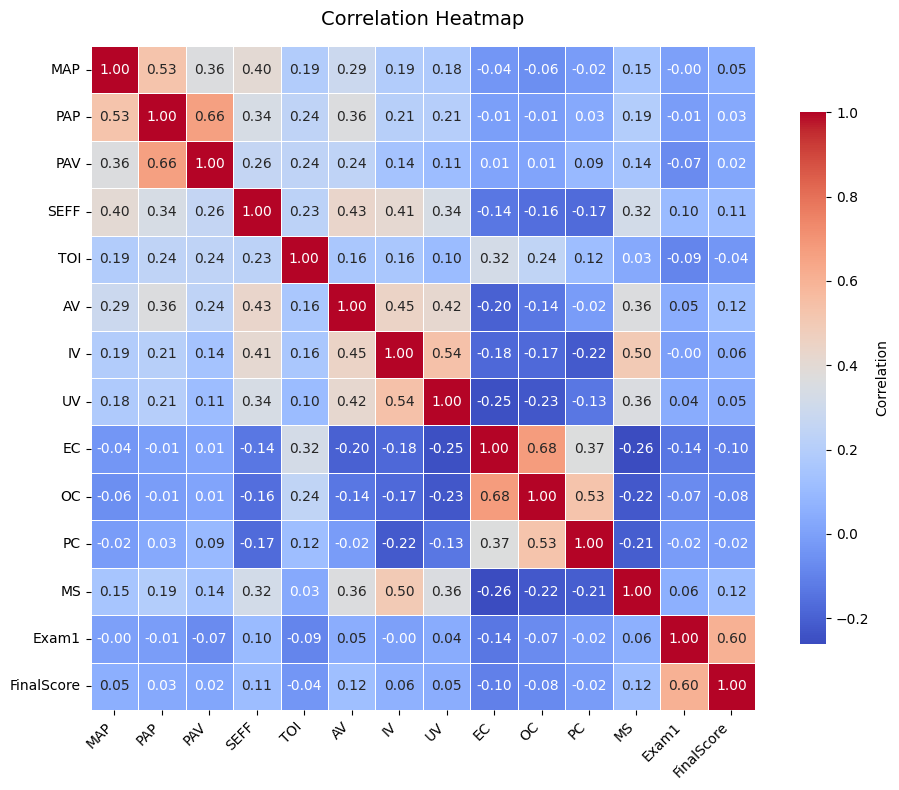

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = Dosage_Motivation.corr()
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,            
    cmap="coolwarm",       
    fmt=".2f",            
    linewidths=0.5,        
    square=True,           
    cbar_kws={"shrink": 0.8, "label": "Correlation"}
)

plt.xticks(rotation=45, ha="right") 
plt.yticks(rotation=0) 
plt.title("Correlation Heatmap", fontsize=14, pad=15)
plt.tight_layout()
plt.show()

## Correlation analysis results

### From the results, we can see that self-efficacy positively related to exam1 score (r = 0.10) and effort cost negatively related to exam1 score (r = -0.14). Self-efficacy, attainment value, and the metacognitive self-regulation positively related to final score and effort cost negatively related to final score.

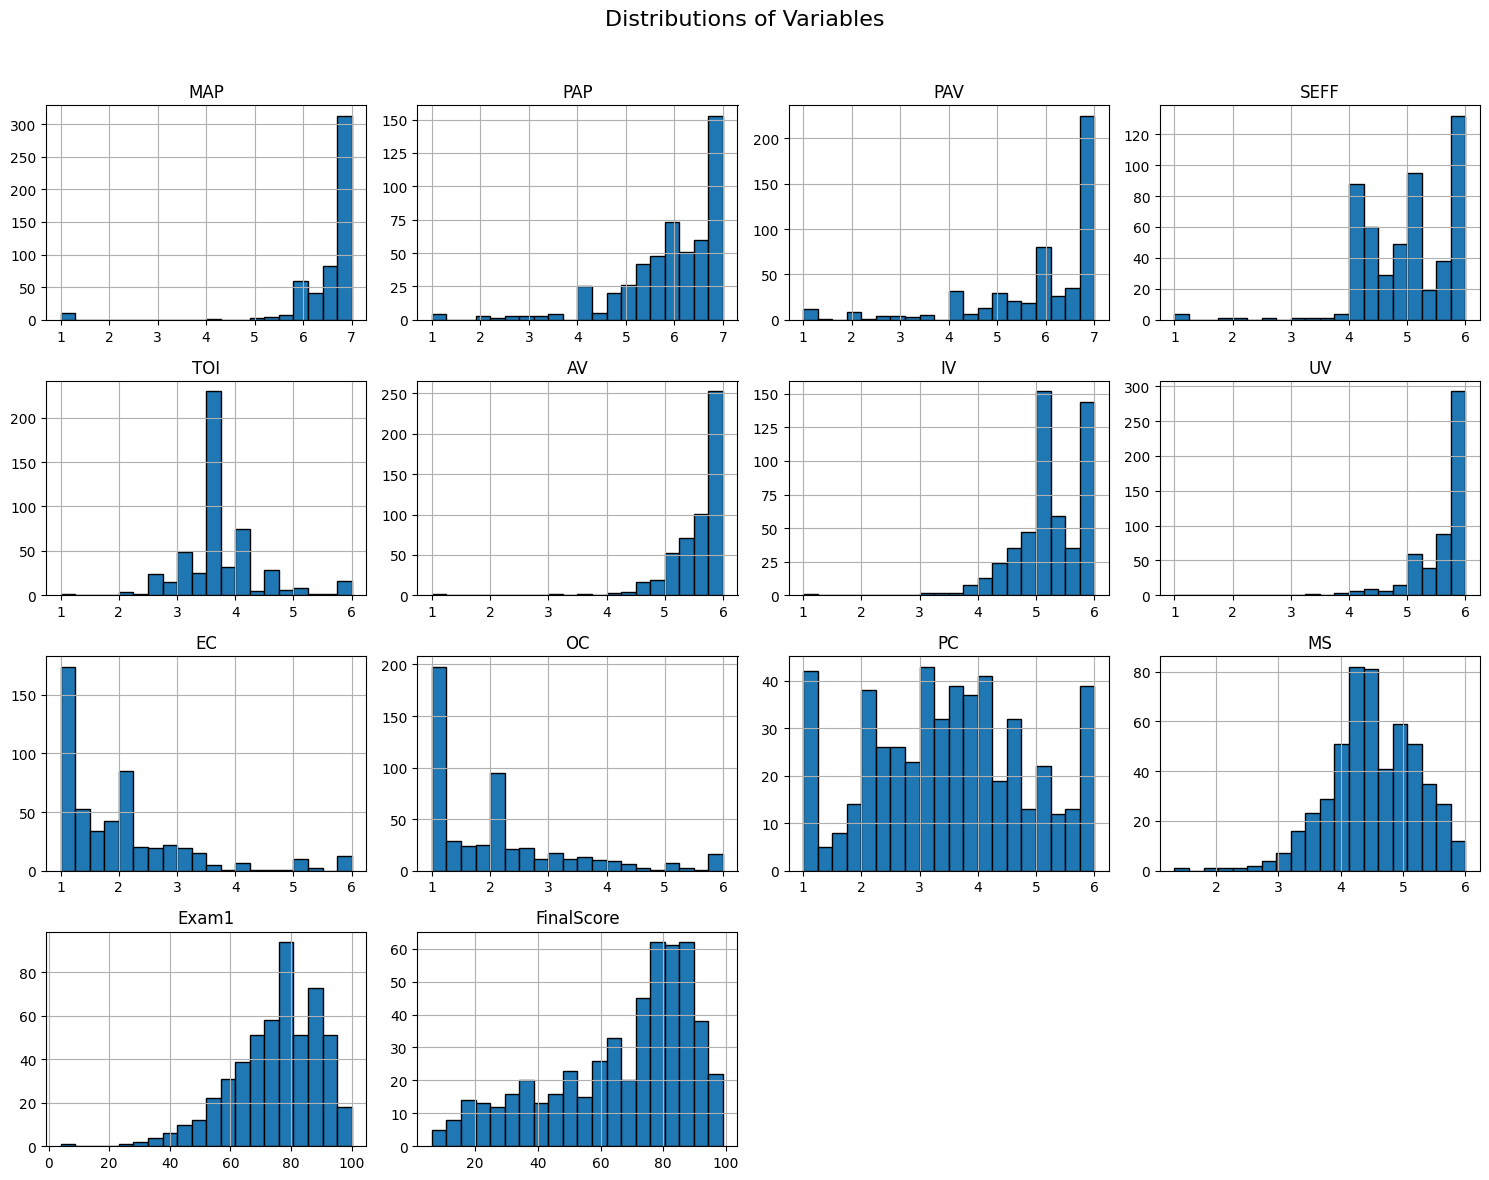

In [22]:
Dosage_Motivation.hist(figsize=(15, 12), bins=20, edgecolor="black")
plt.suptitle("Distributions of Variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Model achitecture

### I tried different models in this project. First, I tried supervised learning models (linear regression, decision tree, KNN, random forest, XGBoost, support vector machine, and neural network) to use motivation variables to predict the exam1 score and final score, and compare the model performance in terms of RMSE and R^^2. Then, I tried unsupervised learning models (K-means clustering, Gaussian mixture models, and hierarchical clustering) to cluster the motivation variables first and select the best cluster number. After that, I checked whether the clustering of each motivation variable made sense and whether there were significant difference in exam1 score and final score among different clusters. Finally, I used the motivation variables and the generated clustering to predict the exam1 score and final score to see whether there was an improvement in model performance. During the process, (hyper)parameter tuning was included. For example, for the decision tree, I changed the model_max_depth to see the performance. For the unsupervised learning, I plotted elbow plots and silhouette scores to select the best cluster number. 

In [23]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

!pip install xgboost
from xgboost import XGBRegressor

predictors = ['MAP', 'PAP', 'PAV', 'SEFF', 'TOI', 'AV', 'IV', 'UV', 'EC', 'OC', 'PC', 'MS']

target = 'Exam1'        

X = Dosage_Motivation[predictors].copy()
y = Dosage_Motivation[target].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Defaulting to user installation because normal site-packages is not writeable


In [24]:
import matplotlib.pyplot as plt

models_and_grids = {
    # 1) Linear regression (baseline)
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {
            "model__fit_intercept": [True, False]
        }
    },

    # 2) Decision tree
    "DecisionTree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "model__max_depth": [None, 3, 5, 7],
            "model__min_samples_split": [2, 5, 10],
            "model__min_samples_leaf": [1, 2, 4]
        }
    },

    # 3) KNN
    "KNN": {
        "model": KNeighborsRegressor(),
        "params": {
            "model__n_neighbors": [3, 5, 7, 9, 11],
            "model__weights": ["uniform", "distance"],
            "model__p": [1, 2]   # 1 = Manhattan, 2 = Euclidean
        }
    },

    # 4) Random Forest
    "RandomForest": {
        "model": RandomForestRegressor(random_state=42, n_jobs=-1),
        "params": {
            "model__n_estimators": [200, 500],
            "model__max_depth": [None, 5, 8],
            "model__min_samples_split": [2, 5],
            "model__min_samples_leaf": [1, 2],
            "model__max_features": ["sqrt", "log2"]
        }
    },

    # 5) XGBoost
    "XGBoost": {
        "model": XGBRegressor(
            objective='reg:squarederror',
            random_state=42,
            n_jobs=-1,
            tree_method="hist"      # fast default
        ),
        "params": {
            "model__n_estimators": [200, 500],
            "model__max_depth": [2, 4, 6],
            "model__learning_rate": [0.01, 0.1],
            "model__subsample": [0.8, 1.0],
            "model__colsample_bytree": [0.8, 1.0]
        }
    },

    # 6) SVM (SVR)
    "SVR": {
        "model": SVR(),
        "params": {
            "model__kernel": ["rbf", "linear"],
            "model__C": [0.1, 1, 10],
            "model__epsilon": [0.01, 0.1, 1.0],
            "model__gamma": ["scale", "auto"]
        }
    },

    # 7) Neural network (MLPRegressor)
    "MLP": {
        "model": MLPRegressor(
            max_iter=2000,
            random_state=42
        ),
        "params": {
            "model__hidden_layer_sizes": [(32,), (64,), (64, 32)],
            "model__activation": ["relu"],
            "model__alpha": [1e-4, 1e-3, 1e-2],          # L2 penalty
            "model__learning_rate_init": [1e-3, 1e-2]
        }
    }
}


=== LinearRegression ===
Best params: {'model__fit_intercept': True}
Test RMSE: 15.3869157113475
Test R^2: 0.03827412274879971

=== DecisionTree ===
Best params: {'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10}
Test RMSE: 15.38759917027461
Test R^2: 0.03818868460815983

=== KNN ===
Best params: {'model__n_neighbors': 11, 'model__p': 1, 'model__weights': 'distance'}
Test RMSE: 15.804823769656492
Test R^2: -0.014676185501692585

=== RandomForest ===
Best params: {'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Test RMSE: 15.433301766416102
Test R^2: 0.032466862481880354

=== XGBoost ===
Best params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': 2, 'model__n_estimators': 200, 'model__subsample': 0.8}
Test RMSE: 15.496854005467515
Test R^2: 0.024482116296125178

=== SVR ===
Best params: {'model__C': 0.1, 'model__epsilon': 

,model,test_rmse,test_r2
0,LinearRegression,15.386916,0.038274
1,DecisionTree,15.387599,0.038189
3,RandomForest,15.433302,0.032467
4,XGBoost,15.496854,0.024482
2,KNN,15.804824,-0.014676
5,SVR,15.900549,-0.027005
6,MLP,16.053383,-0.046842


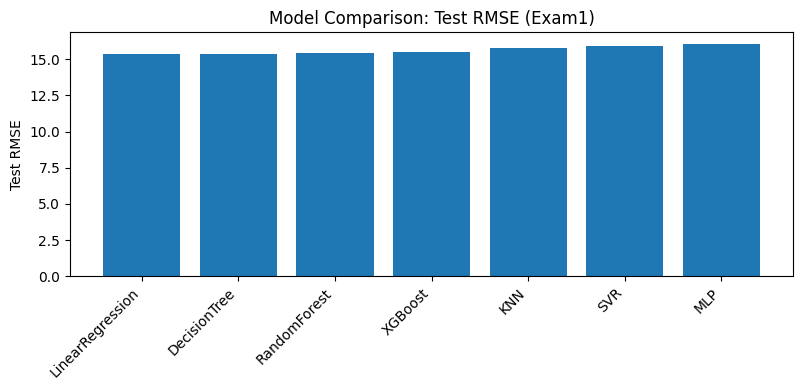

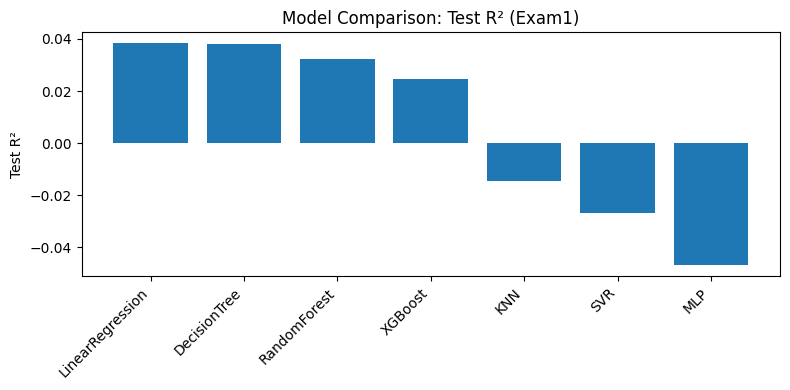

In [25]:
from sklearn.metrics import root_mean_squared_error
results = []

for name, cfg in models_and_grids.items():
    print(f"\n=== {name} ===")

    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", cfg["model"])
    ])

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=cfg["params"],
        cv=5,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_

    # Predictions on test set
    y_pred = best_model.predict(X_test)
    test_rmse = root_mean_squared_error(y_test, y_pred)
    test_r2   = r2_score(y_test, y_pred)

    print("Best params:", grid.best_params_)
    print("Test RMSE:", test_rmse)
    print("Test R^2:", test_r2)

    results.append({
        "model": name,
        "test_rmse": test_rmse,
        "test_r2": test_r2
    })

results_df = pd.DataFrame(results).sort_values("test_rmse")
display(results_df)

# Plot Test RMSE 
plt.figure(figsize=(8, 4))
plt.bar(results_df["model"], results_df["test_rmse"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Test RMSE")
plt.title("Model Comparison: Test RMSE (Exam1)")
plt.tight_layout()
plt.show()

# Plot Test R^2 
plt.figure(figsize=(8, 4))
plt.bar(results_df["model"], results_df["test_r2"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Test R²")
plt.title("Model Comparison: Test R² (Exam1)")
plt.tight_layout()
plt.show()

## Analysis and results

### From the previous results of relationship between motivation and exam1 score, we know that linear regression had the lowest RMSE but neural networks had the highest RMSE. Linear regression also show the highest R^^2. Here linear regression model achieved the best performance.

In [27]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X_unsup = Dosage_Motivation[predictors].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsup)

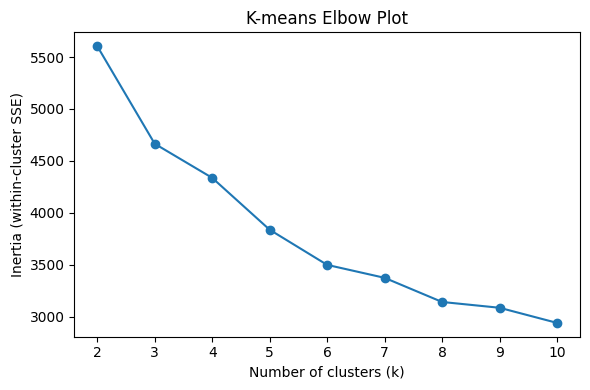

In [28]:
from sklearn.cluster import KMeans

inertias = []
k_values = range(2, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_values, inertias, marker="o")
plt.xticks(k_values)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (within-cluster SSE)")
plt.title("K-means Elbow Plot")
plt.tight_layout()
plt.show()

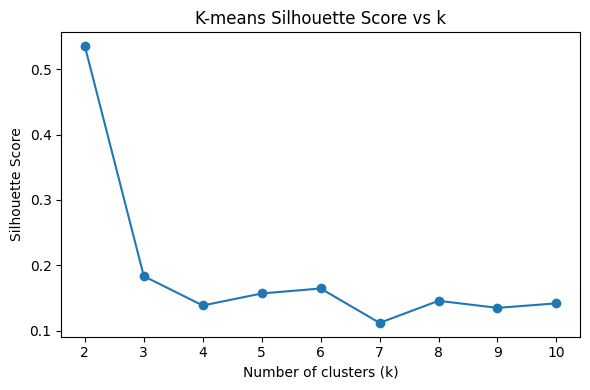

In [29]:
k_values = range(2, 11)
sil_scores = []

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

plt.figure(figsize=(6, 4))
plt.plot(k_values, sil_scores, marker="o")
plt.xticks(k_values)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("K-means Silhouette Score vs k")
plt.tight_layout()
plt.show()

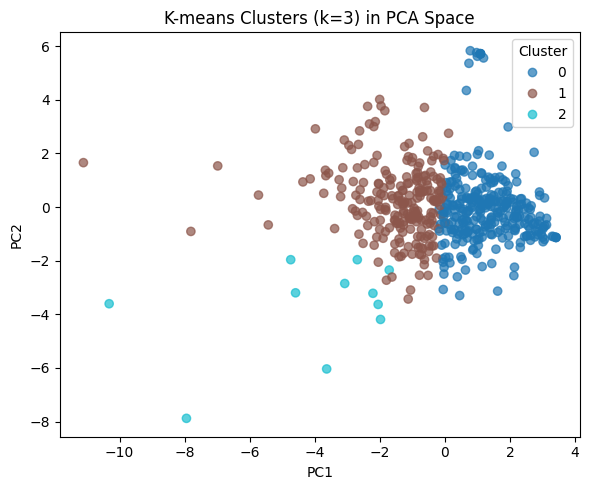

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

best_k = 3  
km = KMeans(n_clusters=best_k, random_state=42)
labels_km = km.fit_predict(X_scaled)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_km, cmap="tab10", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"K-means Clusters (k={best_k}) in PCA Space")

handles, label_values = scatter.legend_elements()
plt.legend(handles, label_values, title="Cluster", loc="best")

plt.tight_layout()
plt.show()

In [33]:
kmeans = KMeans(n_clusters=3, random_state=42)
Dosage_Motivation["KMeansCluster"] = kmeans.fit_predict(X_scaled)

In [34]:
cluster_profile = Dosage_Motivation.groupby("KMeansCluster")[predictors].mean()
cluster_profile

,MAP,PAP,PAV,SEFF,TOI,AV,IV,UV,EC,OC,PC,MS
KMeansCluster,,,,,,,,,,,,
0,6.912037,6.386574,6.370370,5.393056,3.783565,5.769097,5.506944,5.778646,1.620660,1.634549,3.138021,4.876157
1,6.484444,5.594074,5.530370,4.565333,3.546667,5.237778,4.713333,5.248889,2.273333,2.463333,3.743333,4.060370
2,1.000000,2.636364,2.939394,3.527273,3.000000,5.227273,5.181818,5.477273,1.500000,2.000000,3.363636,4.666667


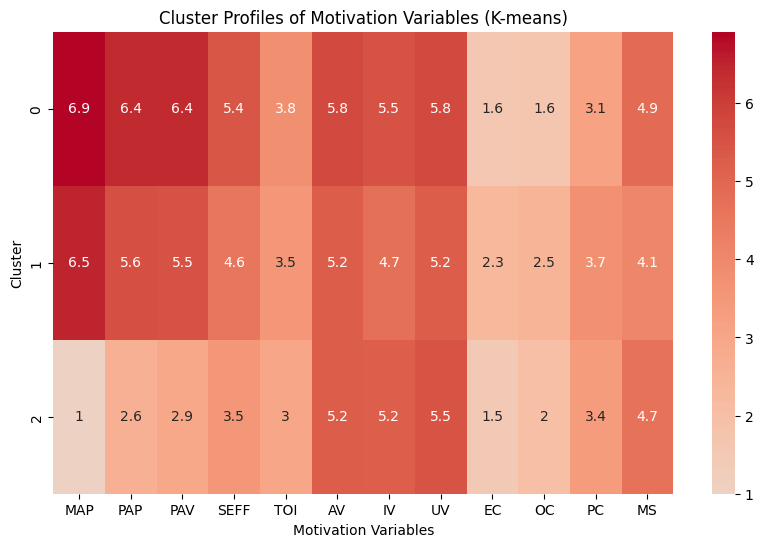

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", center=0)
plt.title("Cluster Profiles of Motivation Variables (K-means)")
plt.xlabel("Motivation Variables")
plt.ylabel("Cluster")
plt.show()

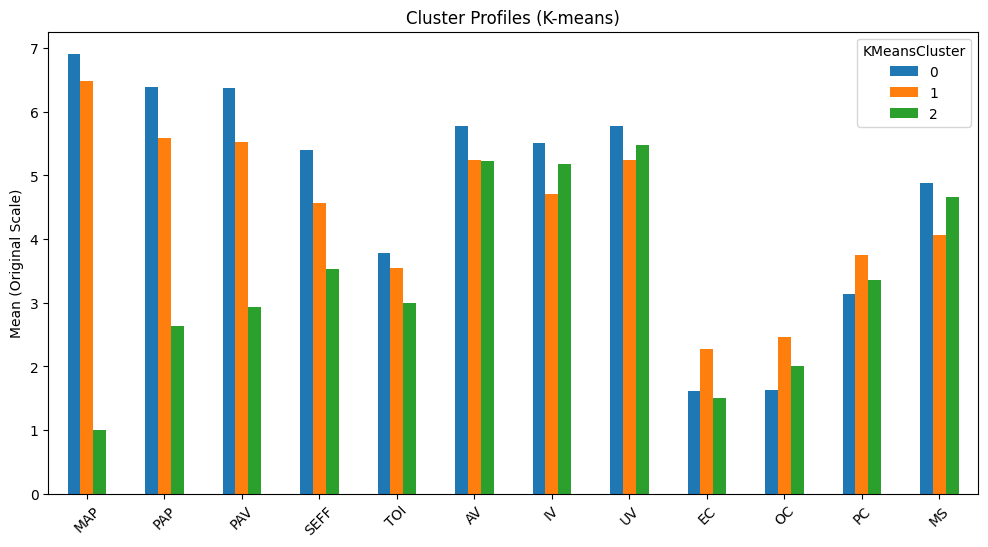

In [36]:
cluster_profile.T.plot(kind="bar", figsize=(12,6))
plt.title("Cluster Profiles (K-means)")
plt.ylabel("Mean (Original Scale)")
plt.xticks(rotation=45)
plt.show()

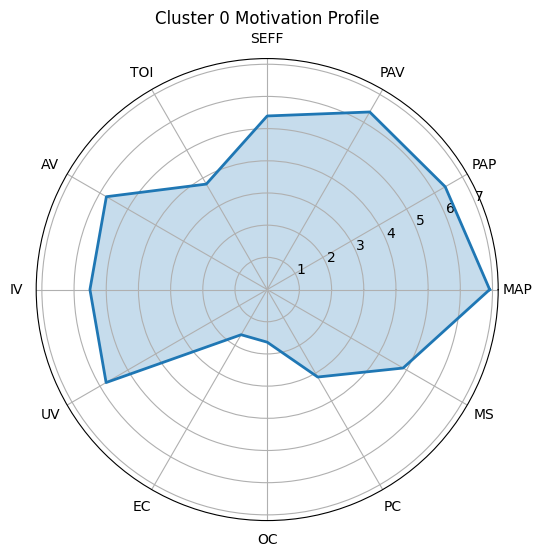

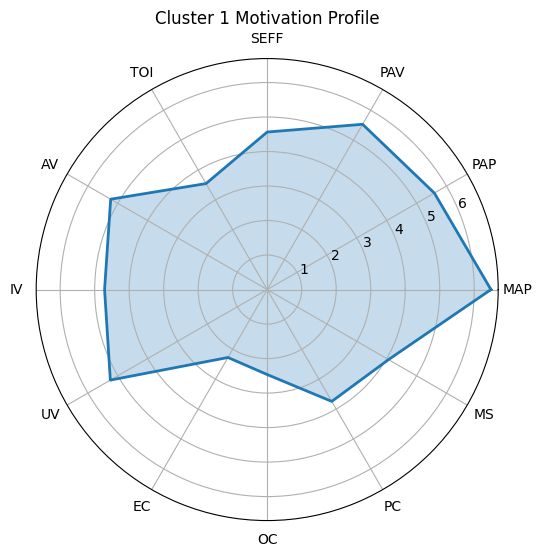

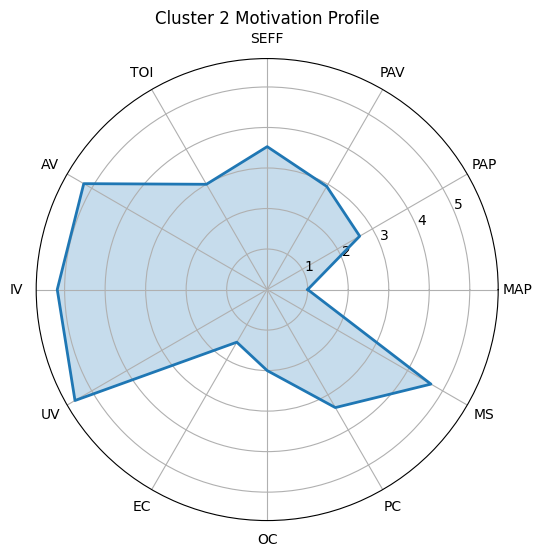

In [37]:
import numpy as np

def radar_plot(df, cluster_id):
    values = df.loc[cluster_id].values
    labels = df.columns
    
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    values = np.concatenate((values,[values[0]]))
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_title(f"Cluster {cluster_id} Motivation Profile")
    plt.show()

for c in cluster_profile.index:
    radar_plot(cluster_profile, c)

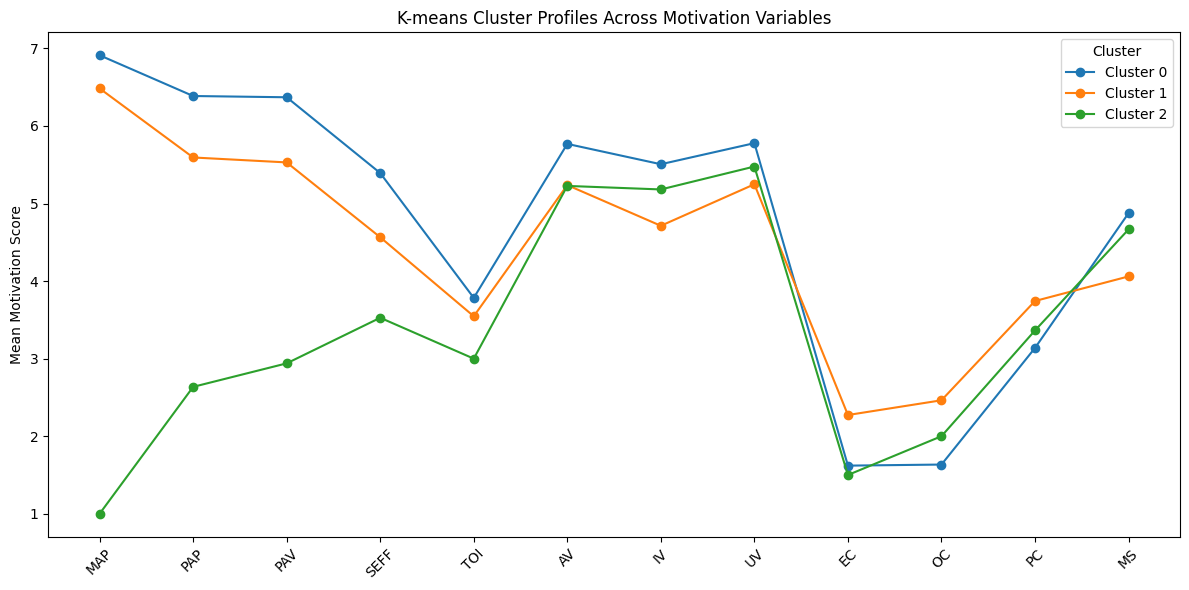

In [38]:
plt.figure(figsize=(12, 6))

for cluster_id in cluster_profile.index:
    plt.plot(predictors,
             cluster_profile.loc[cluster_id],
             marker='o',
             label=f"Cluster {cluster_id}")

plt.xticks(rotation=45)
plt.ylabel("Mean Motivation Score")
plt.title("K-means Cluster Profiles Across Motivation Variables")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

## Analysis and results (k-means clustering)

### Using k-means clustering for motivation variables, three clusters were the most appropriate based on silhouette score. Cluster 0 and cluster 1 are pretty close but they are different from cluter 2 in terms of mastery-approach goals, performance-approach goals, performance-avoidance goals, and self-efficacy. In the following cells, I ran the analysis to see whether these clusters showed differences in exam1 score and final score. The only difference is in final score. Cluster 0 had statistically significant lower final score than cluster 1. For me, this result did not make sense as cluster 0 had higher values and lower costs about the course than cluster 1, which might produce better results in cluster 0.

In [39]:
import scipy.stats as stats

cluster_ids = Dosage_Motivation["KMeansCluster"]

groups = [Dosage_Motivation.loc[cluster_ids == c, "Exam1"] 
          for c in sorted(cluster_ids.unique())]

f_stat, p_value = stats.f_oneway(*groups)
print("Exam1 ANOVA: F =", f_stat, ", p =", p_value)

Exam1 ANOVA: F = 0.5520145268894943 , p = 0.5761250872363975


In [40]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=Dosage_Motivation["Exam1"],
    groups=Dosage_Motivation["KMeansCluster"],
    alpha=0.05
)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  -1.3375 0.5469  -4.3371  1.6622  False
     0      2  -0.2559 0.9981 -10.6129 10.1012  False
     1      2   1.0816 0.9677  -9.3287 11.4919  False
-----------------------------------------------------


In [41]:
groups = [Dosage_Motivation.loc[cluster_ids == c, "FinalScore"] 
          for c in sorted(cluster_ids.unique())]

f_stat, p_value = stats.f_oneway(*groups)
print("FinalScore ANOVA: F =", f_stat, ", p =", p_value)

FinalScore ANOVA: F = 4.790485581003364 , p = 0.008677943153321422


In [42]:
tukey = pairwise_tukeyhsd(
    endog=Dosage_Motivation["FinalScore"],
    groups=Dosage_Motivation["KMeansCluster"],
    alpha=0.05
)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  -6.2138 0.0067 -10.9984 -1.4291   True
     0      2  -6.3035 0.6426 -22.8239  10.217  False
     1      2  -0.0897 0.9999  -16.695 16.5156  False
-----------------------------------------------------


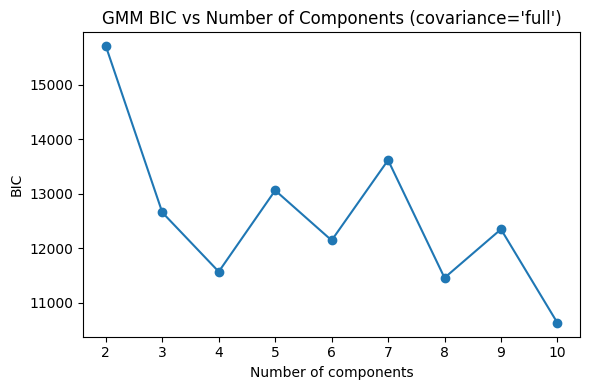

In [43]:
ks = range(2, 11)
bics = []

for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X_scaled)
    bics.append(gmm.bic(X_scaled))

plt.figure(figsize=(6, 4))
plt.plot(ks, bics, marker="o")
plt.xticks(ks)
plt.xlabel("Number of components")
plt.ylabel("BIC")
plt.title("GMM BIC vs Number of Components (covariance='full')")
plt.tight_layout()
plt.show()

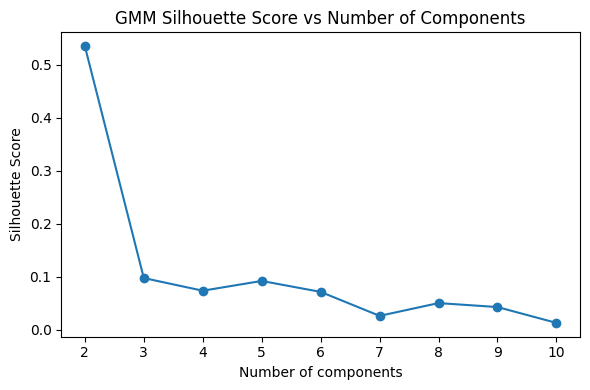

In [44]:
ks = range(2, 11)
sil_scores_gmm = []

for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    labels = gmm.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores_gmm.append(sil)

plt.figure(figsize=(6, 4))
plt.plot(ks, sil_scores_gmm, marker="o")
plt.xticks(ks)
plt.xlabel("Number of components")
plt.ylabel("Silhouette Score")
plt.title("GMM Silhouette Score vs Number of Components")
plt.tight_layout()
plt.show()

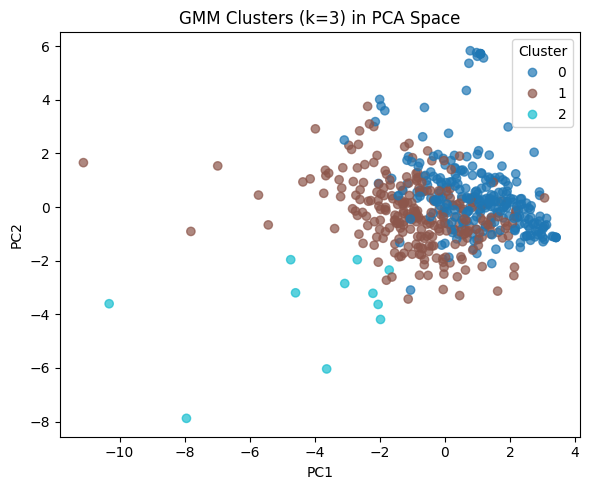

In [45]:
best_k_gmm = 3  
gmm = GaussianMixture(n_components=best_k_gmm, covariance_type='full', random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_gmm, cmap="tab10", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"GMM Clusters (k={best_k_gmm}) in PCA Space")

handles, label_values = scatter.legend_elements()
plt.legend(handles, label_values, title="Cluster", loc="best")

plt.tight_layout()
plt.show()

In [46]:
Dosage_Motivation["GMMCluster"] = gmm.predict(X_scaled)
gmm_profile = Dosage_Motivation.groupby("GMMCluster")[predictors].mean()
gmm_profile

,MAP,PAP,PAV,SEFF,TOI,AV,IV,UV,EC,OC,PC,MS
GMMCluster,,,,,,,,,,,,
0,7.00000,6.563900,6.744401,5.249012,3.812253,5.717391,5.370553,5.694664,1.834980,1.938735,3.412055,4.756588
1,6.45641,5.528205,5.279487,4.816923,3.550641,5.359615,4.952885,5.401923,1.976923,2.055769,3.395192,4.286538
2,1.00000,2.636364,2.939394,3.527273,3.000000,5.227273,5.181818,5.477273,1.500000,2.000000,3.363636,4.666667


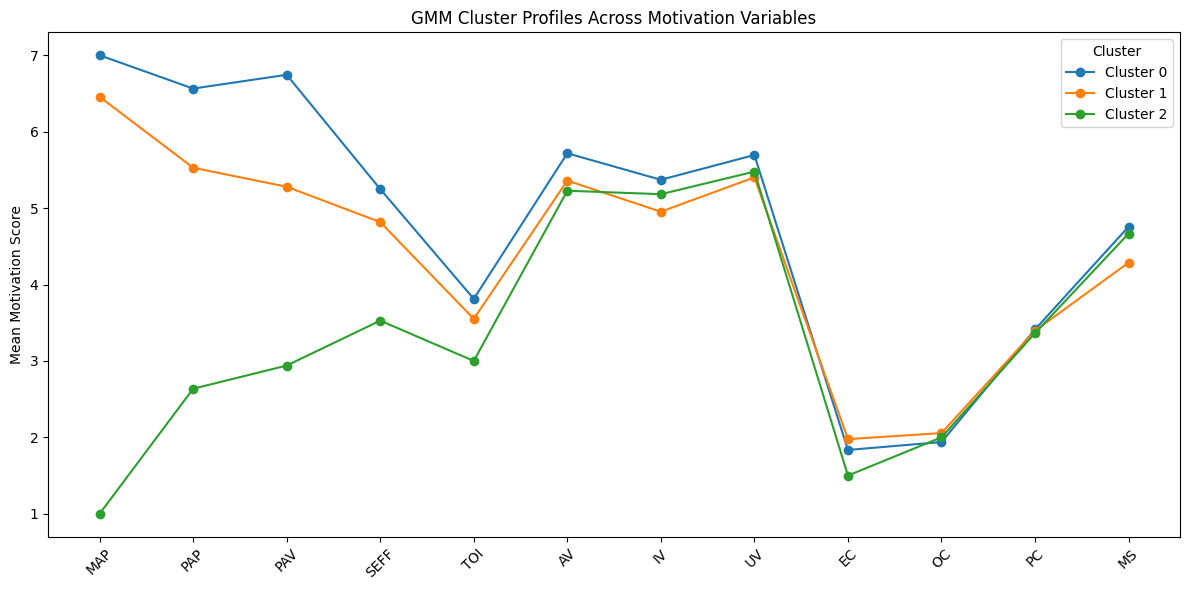

In [47]:
plt.figure(figsize=(12, 6))

for cid in gmm_profile.index:
    plt.plot(predictors,
             gmm_profile.loc[cid],
             marker="o",
             label=f"Cluster {cid}")

plt.xticks(rotation=45)
plt.ylabel("Mean Motivation Score")
plt.title("GMM Cluster Profiles Across Motivation Variables")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

## Analysis and results (GMM clustering)

### From the results, 3 clusters seemed to be the most appropriate based on the silhouette score. The plot is roughly like the plot produced by k-means clustering. There were no differences in terms of exam1 score and final score among different clusters.

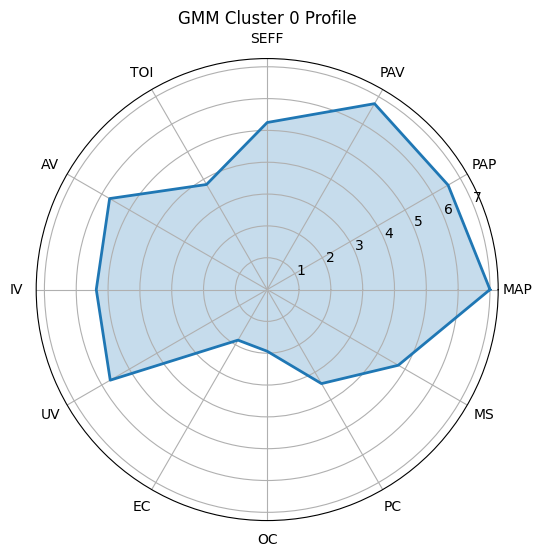

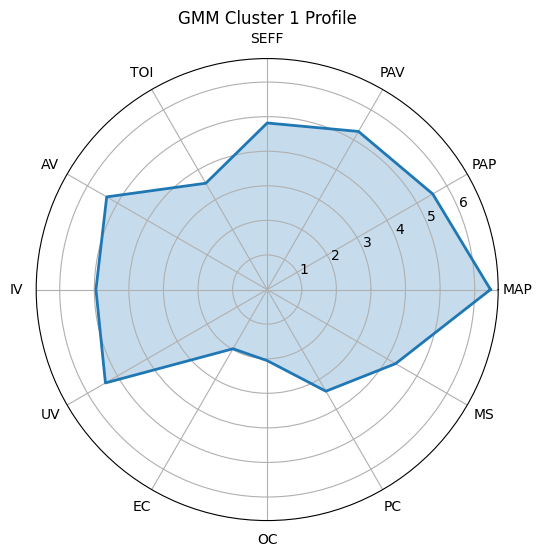

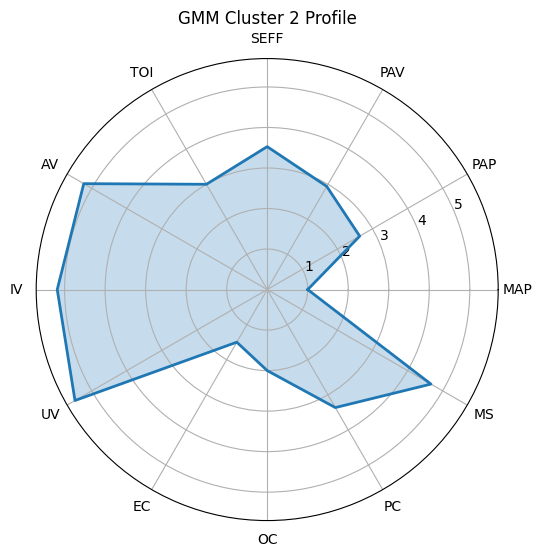

In [48]:
def radar_plot(df, cluster_id):
    values = df.loc[cluster_id].values
    labels = df.columns

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    values = np.concatenate((values, [values[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(f"GMM Cluster {cluster_id} Profile")
    plt.show()

for c in gmm_profile.index:
    radar_plot(gmm_profile, c)

In [49]:
clusters = Dosage_Motivation["GMMCluster"]
exam = Dosage_Motivation["Exam1"]
final = Dosage_Motivation["FinalScore"]

In [50]:
import scipy.stats as stats

# group the exam1 scores by cluster
groups_exam = [exam[clusters == c] for c in sorted(clusters.unique())]

F_exam, p_exam = stats.f_oneway(*groups_exam)

print("ANOVA for Exam1")
print("F-statistic:", F_exam)
print("p-value:", p_exam)

ANOVA for Exam1
F-statistic: 1.6956373762771924
p-value: 0.18449321039586908


In [51]:
# group the final scores by cluster
groups_final = [final[clusters == c] for c in sorted(clusters.unique())]

F_final, p_final = stats.f_oneway(*groups_final)

print("ANOVA for FinalScore")
print("F-statistic:", F_final)
print("p-value:", p_final)

ANOVA for FinalScore
F-statistic: 0.8709379138090206
p-value: 0.41916726694917883


In [52]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_exam = pairwise_tukeyhsd(
    endog = Dosage_Motivation["Exam1"],
    groups = Dosage_Motivation["GMMCluster"],
    alpha = 0.05
)

print(tukey_exam)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   2.3255 0.1577  -0.6452  5.2962  False
     0      2   1.5094 0.9374  -8.8513 11.8701  False
     1      2  -0.8162 0.9813 -11.1711  9.5387  False
-----------------------------------------------------


In [53]:
tukey_final = pairwise_tukeyhsd(
    endog = Dosage_Motivation["FinalScore"],
    groups = Dosage_Motivation["GMMCluster"],
    alpha = 0.05
)

print(tukey_final)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  -2.4783 0.4433  -7.2626  2.3061  False
     0      2  -4.8342 0.7747 -21.5203  11.852  False
     1      2  -2.3559  0.941 -19.0327 14.3209  False
-----------------------------------------------------


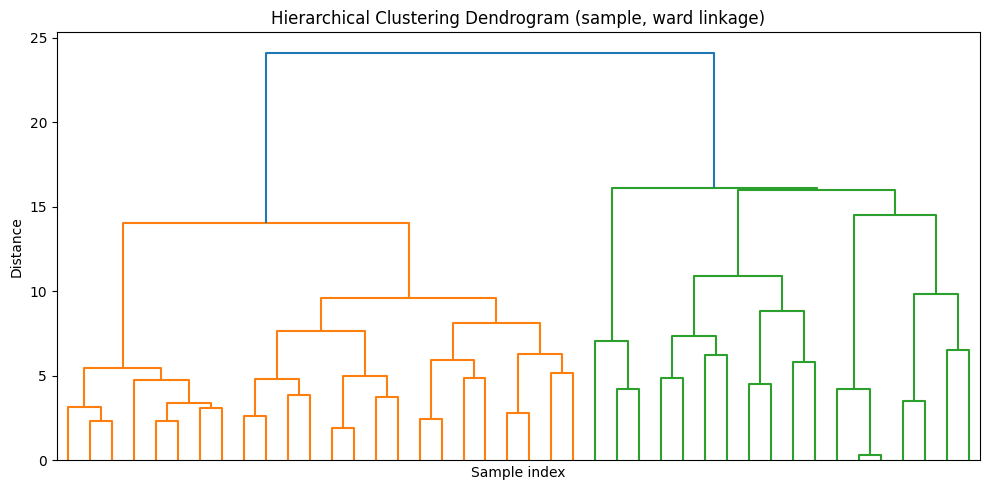

In [54]:
from scipy.cluster.hierarchy import linkage, dendrogram

n_sample = min(150, X_scaled.shape[0])
idx = np.random.RandomState(42).choice(X_scaled.shape[0], n_sample, replace=False)
X_sample = X_scaled[idx]

Z = linkage(X_sample, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="level", p=5, no_labels=True)
plt.title("Hierarchical Clustering Dendrogram (sample, ward linkage)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

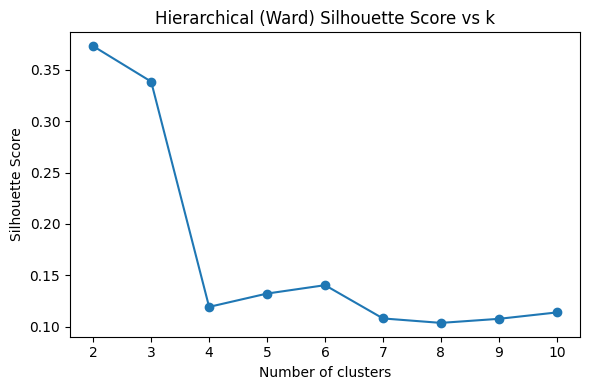

In [55]:
from sklearn.cluster import AgglomerativeClustering

ks = range(2, 11)
sil_scores_hier = []

for k in ks:
    hier = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hier.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores_hier.append(sil)

plt.figure(figsize=(6, 4))
plt.plot(ks, sil_scores_hier, marker="o")
plt.xticks(ks)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Hierarchical (Ward) Silhouette Score vs k")
plt.tight_layout()
plt.show()

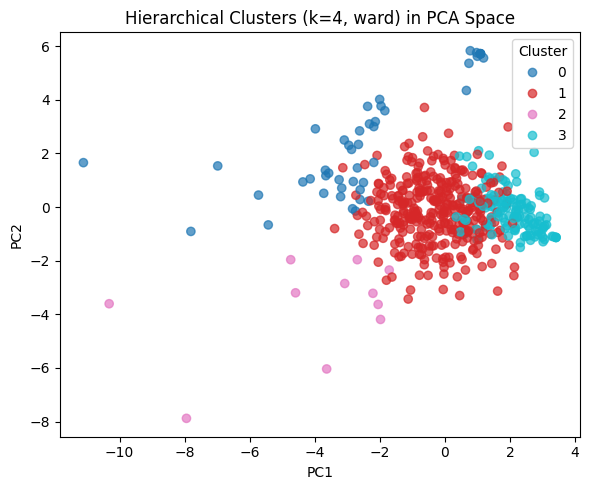

In [56]:
best_k_hier = 4
hier = AgglomerativeClustering(n_clusters=best_k_hier, linkage='ward')
labels_hier = hier.fit_predict(X_scaled)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_hier, cmap="tab10", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"Hierarchical Clusters (k={best_k_hier}, ward) in PCA Space")

handles, label_values = scatter.legend_elements()
plt.legend(handles, label_values, title="Cluster", loc="best")

plt.tight_layout()
plt.show()

In [57]:
Dosage_Motivation["HierCluster"] = labels_hier
cluster_profile = Dosage_Motivation.groupby("HierCluster")[predictors].mean()
cluster_profile

,MAP,PAP,PAV,SEFF,TOI,AV,IV,UV,EC,OC,PC,MS
HierCluster,,,,,,,,,,,,
0,6.361702,5.659574,5.730496,4.651064,4.170213,5.005319,4.712766,4.957447,4.340426,4.292553,4.994681,4.127660
1,6.698413,5.849206,5.724206,4.886310,3.547123,5.468750,4.989583,5.511905,1.761905,1.921875,3.465774,4.397817
2,1.000000,2.636364,2.939394,3.527273,3.000000,5.227273,5.181818,5.477273,1.500000,2.000000,3.363636,4.666667
3,6.923077,6.666667,6.817949,5.538462,3.844872,5.901923,5.757692,5.848077,1.401923,1.365385,2.667308,4.971154


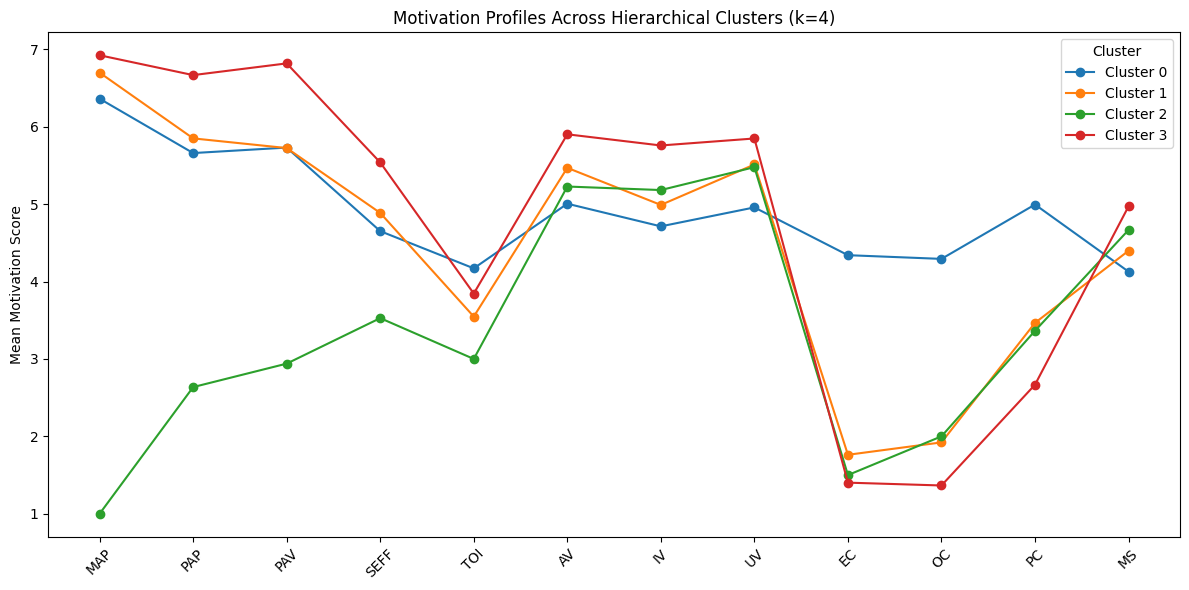

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for cid in cluster_profile.index:
    plt.plot(predictors,
             cluster_profile.loc[cid],
             marker="o",
             label=f"Cluster {cid}")

plt.xticks(rotation=45)
plt.ylabel("Mean Motivation Score")
plt.title("Motivation Profiles Across Hierarchical Clusters (k=4)")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

## Analysis and results (hierarchical clustering)

### From the results, 4 clusters seemed to be the most appropriate based on silhouette score. Cluster 0 are different from cluster 2 in terms of mastery-approach goal, performance-approach goal, performance-avoidance goal, and self-efficacy. Cluster 0 are different from cluster 1 and cluster 3 in terms of effort cost, opportunity cost, and psychological costs. There were no differences in terms of exam1 score and final score among different clusters.

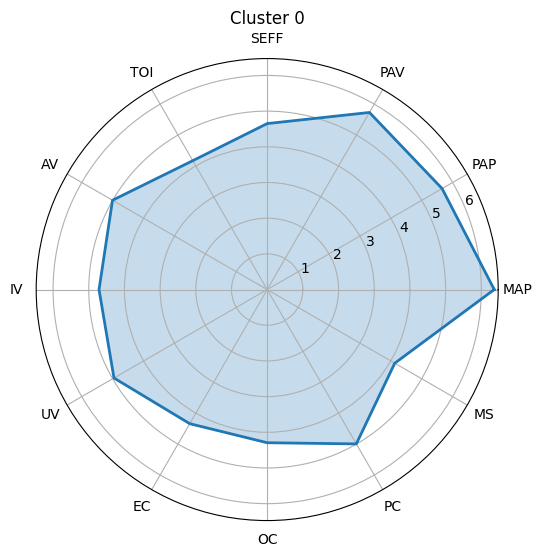

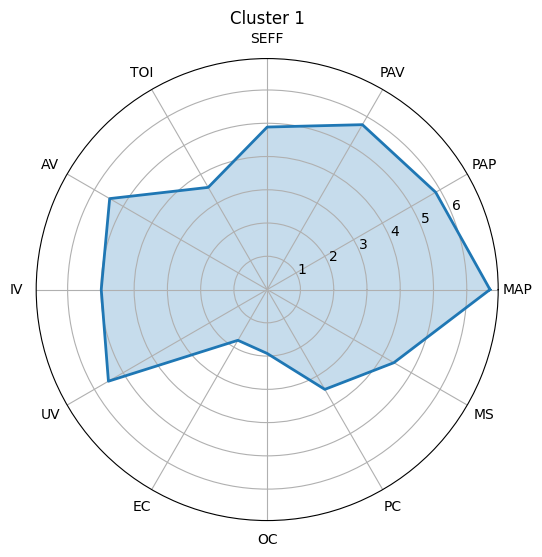

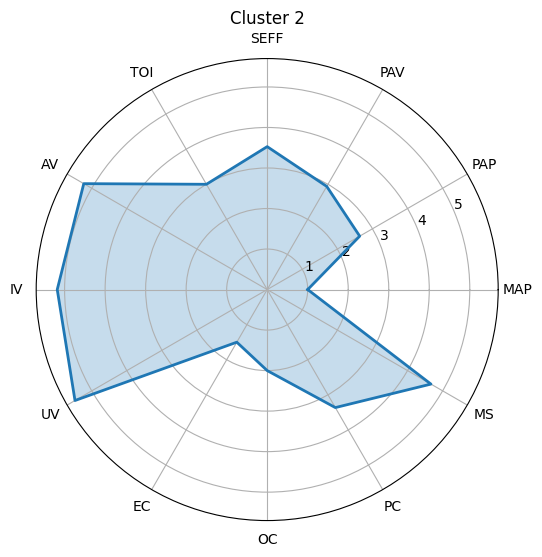

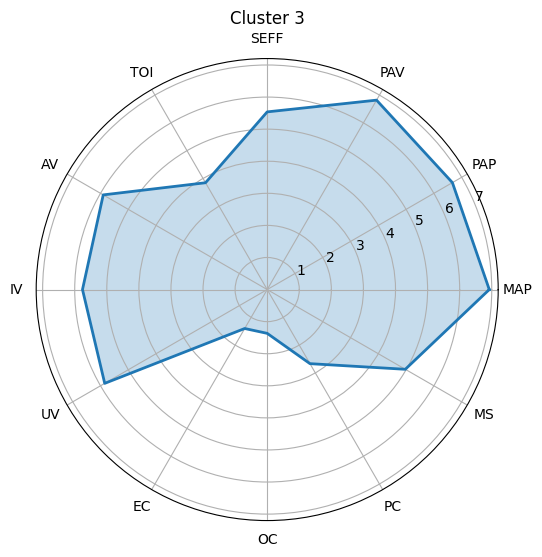

In [59]:
import numpy as np

def radar_plot(df, cid):
    values = df.loc[cid].values
    labels = df.columns
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(f"Cluster {cid}")
    plt.show()

for cid in cluster_profile.index:
    radar_plot(cluster_profile, cid)

In [60]:
Dosage_Motivation["HierCluster"]
clusters = Dosage_Motivation["HierCluster"]

exam = Dosage_Motivation["Exam1"]

# Group scores by each cluster (0,1,2,3)
groups_exam = [exam[clusters == c] for c in sorted(clusters.unique())]

F_exam, p_exam = stats.f_oneway(*groups_exam)

print("ANOVA — Exam1")
print("F-statistic:", F_exam)
print("p-value:", p_exam)

ANOVA — Exam1
F-statistic: 0.8238075151641762
p-value: 0.4811136484118287


In [61]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_exam = pairwise_tukeyhsd(
    endog = Dosage_Motivation["Exam1"],
    groups = Dosage_Motivation["HierCluster"],
    alpha = 0.05
)

print(tukey_exam)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   3.5013 0.3979  -2.2538  9.2563  False
     0      2   3.3714 0.8963  -9.0062  15.749  False
     0      3   2.9496 0.6216  -3.3402  9.2393  False
     1      2  -0.1298    1.0  -11.453 11.1933  False
     1      3  -0.5517 0.9823  -4.3687  3.2653  False
     2      3  -0.4218 0.9997 -12.0259 11.1822  False
-----------------------------------------------------


In [62]:
final = Dosage_Motivation["FinalScore"]

groups_final = [final[clusters == c] for c in sorted(clusters.unique())]

F_final, p_final = stats.f_oneway(*groups_final)

print("ANOVA — FinalScore")
print("F-statistic:", F_final)
print("p-value:", p_final)

ANOVA — FinalScore
F-statistic: 2.1918178248850744
p-value: 0.08807896070516028


In [63]:
tukey_final = pairwise_tukeyhsd(
    endog = Dosage_Motivation["FinalScore"],
    groups = Dosage_Motivation["HierCluster"],
    alpha = 0.05
)

print(tukey_final)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1   8.5853 0.0782  -0.6326 17.8032  False
     0      2   4.3924 0.9407 -15.4329 24.2177  False
     0      3   9.2633 0.0842   -0.811 19.3377  False
     1      2  -4.1929 0.9333 -22.3292 13.9435  False
     1      3   0.6781 0.9919  -5.4356  6.7918  False
     2      3   4.8709 0.9064 -13.7154 23.4573  False
-----------------------------------------------------


In [64]:
best_k_kmeans = 3
best_k_gmm = 3
best_k_hier = 4

In [65]:
kmeans = KMeans(n_clusters=best_k_kmeans, random_state=42)
Dosage_Motivation["KMeansCluster"] = kmeans.fit_predict(X_scaled)

gmm = GaussianMixture(n_components=best_k_gmm, covariance_type='full', random_state=42)
Dosage_Motivation["GMMCluster"] = gmm.fit_predict(X_scaled)

hier = AgglomerativeClustering(n_clusters=best_k_hier, linkage="ward")
Dosage_Motivation["HierCluster"] = hier.fit_predict(X_scaled)

In [66]:
cluster_features = ["KMeansCluster", "GMMCluster", "HierCluster"]

all_predictors = predictors + cluster_features

In [67]:
X = Dosage_Motivation[all_predictors].copy()
y = Dosage_Motivation['Exam1'].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


=== LinearRegression ===
Best params: {'model__fit_intercept': True}
Test RMSE: 15.472671340026944
Test R^2: 0.027524310041342592

=== DecisionTree ===
Best params: {'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10}
Test RMSE: 15.387599170274612
Test R^2: 0.038188684608159496

=== KNN ===
Best params: {'model__n_neighbors': 11, 'model__p': 1, 'model__weights': 'distance'}
Test RMSE: 15.566598968721257
Test R^2: 0.015681547712123822

=== RandomForest ===
Best params: {'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 500}
Test RMSE: 15.443693637670727
Test R^2: 0.03116346480360399

=== XGBoost ===
Best params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': 2, 'model__n_estimators': 200, 'model__subsample': 0.8}
Test RMSE: 15.494518410328537
Test R^2: 0.024776142829728176

=== SVR ===
Best params: {'model__C': 0.1, 'model__epsilon

,model,test_rmse,test_r2
1,DecisionTree,15.387599,0.038189
3,RandomForest,15.443694,0.031163
0,LinearRegression,15.472671,0.027524
4,XGBoost,15.494518,0.024776
2,KNN,15.566599,0.015682
5,SVR,15.898638,-0.026758
6,MLP,16.847291,-0.152944


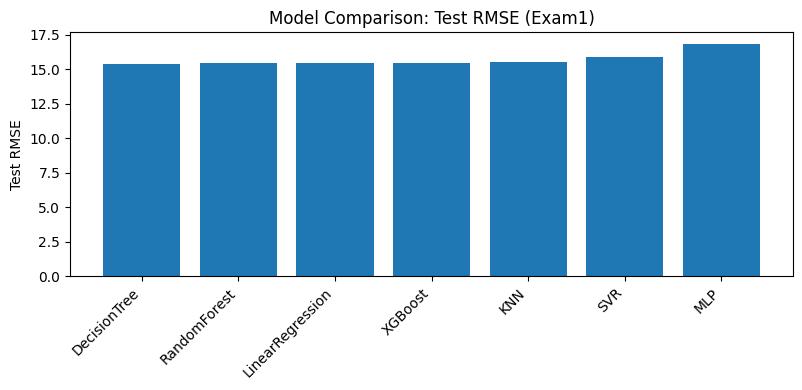

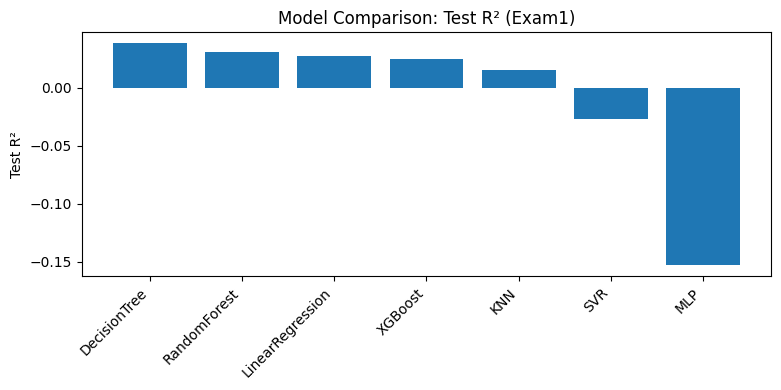

In [68]:
models_and_grids = {

    "LinearRegression": {
        "model": LinearRegression(),
        "params": {
            "model__fit_intercept": [True, False]
        }
    },

    "DecisionTree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "model__max_depth": [None, 3, 5, 7],
            "model__min_samples_split": [2, 5, 10],
            "model__min_samples_leaf": [1, 2, 4]
        }
    },

    "KNN": {
        "model": KNeighborsRegressor(),
        "params": {
            "model__n_neighbors": [3, 5, 7, 11],
            "model__weights": ["uniform", "distance"],
            "model__p": [1, 2]   # 1 = Manhattan, 2 = Euclidean
        }
    },

    "RandomForest": {
        "model": RandomForestRegressor(random_state=42, n_jobs=-1),
        "params": {
            "model__n_estimators": [200, 500],
            "model__max_depth": [None, 5, 10],
            "model__min_samples_split": [2, 5],
            "model__min_samples_leaf": [1, 2],
            "model__max_features": ["sqrt", "log2"]
        }
    },

    "XGBoost": {
        "model": XGBRegressor(
            objective='reg:squarederror',
            random_state=42,
            n_jobs=-1,
            tree_method="hist"
        ),
        "params": {
            "model__n_estimators": [200, 500],
            "model__max_depth": [2, 4, 6],
            "model__learning_rate": [0.01, 0.1],
            "model__subsample": [0.8, 1.0],
            "model__colsample_bytree": [0.8, 1.0]
        }
    },

    "SVR": {
        "model": SVR(),
        "params": {
            "model__kernel": ["rbf", "linear"],
            "model__C": [0.1, 1, 10],
            "model__epsilon": [0.01, 0.1, 1.0],
            "model__gamma": ["scale", "auto"]
        }
    },

    "MLP": {
        "model": MLPRegressor(
            max_iter=2000,
            random_state=42
        ),
        "params": {
            "model__hidden_layer_sizes": [(32,), (64,), (64, 32)],
            "model__activation": ["relu"],
            "model__alpha": [1e-4, 1e-3, 1e-2],
            "model__learning_rate_init": [1e-3, 1e-2]
        }
    }
}

from sklearn.compose import ColumnTransformer

numeric_features = predictors      # the 12 motivation variables
categorical_features = cluster_features  # the cluster labels

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", "passthrough", categorical_features)
    ]
)

results = []

for name, cfg in models_and_grids.items():
    print(f"\n=== {name} ===")

    pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", cfg["model"])])

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=cfg["params"],
        cv=5,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_

    y_pred = best_model.predict(X_test)
    test_rmse = root_mean_squared_error(y_test, y_pred)
    test_r2   = r2_score(y_test, y_pred)

    print("Best params:", grid.best_params_)
    print("Test RMSE:", test_rmse)
    print("Test R^2:", test_r2)

    results.append({
        "model": name,
        "test_rmse": test_rmse,
        "test_r2": test_r2
    })

results_df = pd.DataFrame(results).sort_values("test_rmse")
display(results_df)

plt.figure(figsize=(8, 4))
plt.bar(results_df["model"], results_df["test_rmse"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Test RMSE")
plt.title("Model Comparison: Test RMSE (Exam1)")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 4))
plt.bar(results_df["model"], results_df["test_r2"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Test R²")
plt.title("Model Comparison: Test R² (Exam1)")
plt.tight_layout()
plt.show()

## Analysis and results (adding clustering as an variable)

### Decision tree had the lowest RMSE and highest R^^2. It performed a little better than random forest and linear regression. However, adding the new variable did not yield an improvement in model performance.

In [69]:
X = Dosage_Motivation[predictors].copy()
y = Dosage_Motivation['FinalScore'].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [70]:
models_and_grids = {
    # 1) Linear regression (baseline)
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {
            "model__fit_intercept": [True, False]
        }
    },

    # 2) Decision tree
    "DecisionTree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "model__max_depth": [None, 3, 5, 7],
            "model__min_samples_split": [2, 5, 10],
            "model__min_samples_leaf": [1, 2, 4]
        }
    },

    # 3) KNN
    "KNN": {
        "model": KNeighborsRegressor(),
        "params": {
            "model__n_neighbors": [3, 5, 7, 9, 11],
            "model__weights": ["uniform", "distance"],
            "model__p": [1, 2]   # 1 = Manhattan, 2 = Euclidean
        }
    },

    # 4) Random Forest
    "RandomForest": {
        "model": RandomForestRegressor(random_state=42, n_jobs=-1),
        "params": {
            "model__n_estimators": [200, 500],
            "model__max_depth": [None, 5, 8],
            "model__min_samples_split": [2, 5],
            "model__min_samples_leaf": [1, 2],
            "model__max_features": ["sqrt", "log2"]
        }
    },

    # 5) XGBoost
    "XGBoost": {
        "model": XGBRegressor(
            objective='reg:squarederror',
            random_state=42,
            n_jobs=-1,
            tree_method="hist"      # fast default
        ),
        "params": {
            "model__n_estimators": [200, 500],
            "model__max_depth": [2, 4, 6],
            "model__learning_rate": [0.01, 0.1],
            "model__subsample": [0.8, 1.0],
            "model__colsample_bytree": [0.8, 1.0]
        }
    },

    # 6) SVM (SVR)
    "SVR": {
        "model": SVR(),
        "params": {
            "model__kernel": ["rbf", "linear"],
            "model__C": [0.1, 1, 10],
            "model__epsilon": [0.01, 0.1, 1.0],
            "model__gamma": ["scale", "auto"]
        }
    },

    # 7) Neural network (MLPRegressor)
    "MLP": {
        "model": MLPRegressor(
            max_iter=5000,
            random_state=42
        ),
        "params": {
            "model__hidden_layer_sizes": [(32,), (64,), (64, 32)],
            "model__activation": ["relu"],
            "model__alpha": [1e-4, 1e-3, 1e-2],          # L2 penalty
            "model__learning_rate_init": [1e-3, 1e-2]
        }
    }
}


=== LinearRegression ===
Best params: {'model__fit_intercept': True}
Test RMSE: 22.144990103578643
Test R^2: 0.024215745228566177

=== DecisionTree ===
Best params: {'model__max_depth': 3, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5}
Test RMSE: 22.613510646494607
Test R^2: -0.01751027782292658

=== KNN ===
Best params: {'model__n_neighbors': 9, 'model__p': 1, 'model__weights': 'uniform'}
Test RMSE: 22.4899450964407
Test R^2: -0.006420826733955831

=== RandomForest ===
Best params: {'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 500}
Test RMSE: 21.62106435884422
Test R^2: 0.06984148938188295

=== XGBoost ===
Best params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': 2, 'model__n_estimators': 200, 'model__subsample': 0.8}
Test RMSE: 21.83264205764247
Test R^2: 0.05154787416134632

=== SVR ===
Best params: {'model__C': 0.1, 'model__epsilon': 1.0,

,model,test_rmse,test_r2
3,RandomForest,21.621064,0.069841
4,XGBoost,21.832642,0.051548
0,LinearRegression,22.144990,0.024216
2,KNN,22.489945,-0.006421
1,DecisionTree,22.613511,-0.017510
6,MLP,22.882880,-0.041896
5,SVR,23.490066,-0.097921


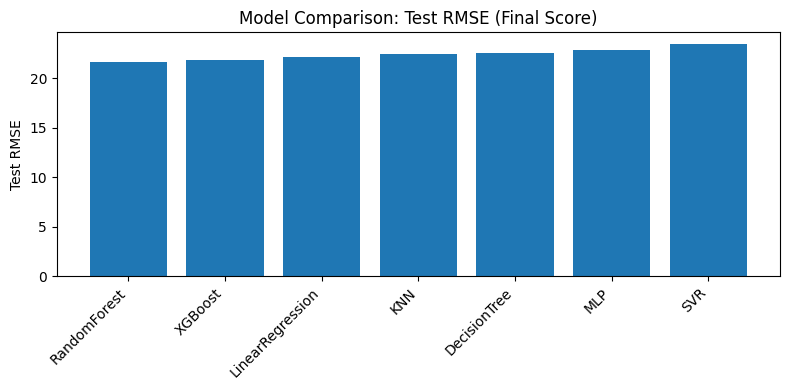

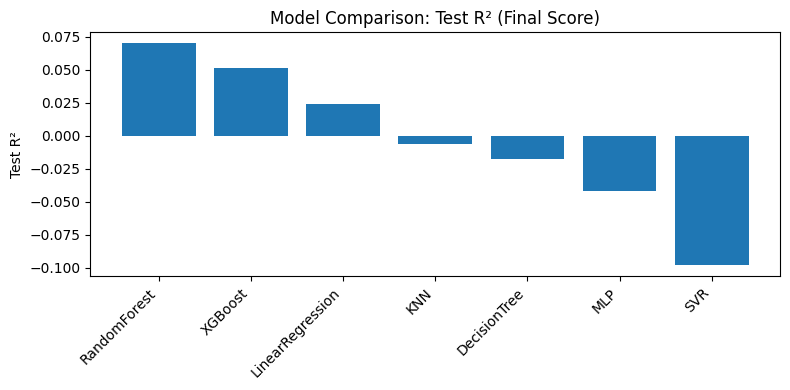

In [71]:
results = []

for name, cfg in models_and_grids.items():
    print(f"\n=== {name} ===")

    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", cfg["model"])
    ])

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=cfg["params"],
        cv=5,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_

    # Predictions on test set
    y_pred = best_model.predict(X_test)
    test_rmse = root_mean_squared_error(y_test, y_pred)
    test_r2   = r2_score(y_test, y_pred)

    print("Best params:", grid.best_params_)
    print("Test RMSE:", test_rmse)
    print("Test R^2:", test_r2)

    results.append({
        "model": name,
        "test_rmse": test_rmse,
        "test_r2": test_r2
    })

results_df = pd.DataFrame(results).sort_values("test_rmse")
display(results_df)

# Plot Test RMSE 
plt.figure(figsize=(8, 4))
plt.bar(results_df["model"], results_df["test_rmse"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Test RMSE")
plt.title("Model Comparison: Test RMSE (Final Score)")
plt.tight_layout()
plt.show()

# Plot Test R^2 
plt.figure(figsize=(8, 4))
plt.bar(results_df["model"], results_df["test_r2"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Test R²")
plt.title("Model Comparison: Test R² (Final Score)")
plt.tight_layout()
plt.show()

## Analysis and results (final score)

### From the results, random forest had the lowest RMSE and the highest R^^2. The motivation variables explained a higher variance in predicting the final score than predicting the exam1 score. 

In [72]:
X = Dosage_Motivation[all_predictors].copy()
y = Dosage_Motivation['FinalScore'].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [73]:
models_and_grids = {

    "LinearRegression": {
        "model": LinearRegression(),
        "params": {
            "model__fit_intercept": [True, False]
        }
    },

    "DecisionTree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "model__max_depth": [None, 3, 5, 7],
            "model__min_samples_split": [2, 5, 10],
            "model__min_samples_leaf": [1, 2, 4]
        }
    },

    "KNN": {
        "model": KNeighborsRegressor(),
        "params": {
            "model__n_neighbors": [3, 5, 7, 11],
            "model__weights": ["uniform", "distance"],
            "model__p": [1, 2]   # 1 = Manhattan, 2 = Euclidean
        }
    },

    "RandomForest": {
        "model": RandomForestRegressor(random_state=42, n_jobs=-1),
        "params": {
            "model__n_estimators": [200, 500],
            "model__max_depth": [None, 5, 10],
            "model__min_samples_split": [2, 5],
            "model__min_samples_leaf": [1, 2],
            "model__max_features": ["sqrt", "log2"]
        }
    },

    "XGBoost": {
        "model": XGBRegressor(
            objective='reg:squarederror',
            random_state=42,
            n_jobs=-1,
            tree_method="hist"
        ),
        "params": {
            "model__n_estimators": [200, 500],
            "model__max_depth": [2, 4, 6],
            "model__learning_rate": [0.01, 0.1],
            "model__subsample": [0.8, 1.0],
            "model__colsample_bytree": [0.8, 1.0]
        }
    },

    "SVR": {
        "model": SVR(),
        "params": {
            "model__kernel": ["rbf", "linear"],
            "model__C": [0.1, 1, 10],
            "model__epsilon": [0.01, 0.1, 1.0],
            "model__gamma": ["scale", "auto"]
        }
    },

    "MLP": {
        "model": MLPRegressor(
            max_iter=2000,
            random_state=42
        ),
        "params": {
            "model__hidden_layer_sizes": [(32,), (64,), (64, 32)],
            "model__activation": ["relu"],
            "model__alpha": [1e-4, 1e-3, 1e-2],
            "model__learning_rate_init": [1e-3, 1e-2]
        }
    }
}


=== LinearRegression ===
Best params: {'model__fit_intercept': True}
Test RMSE: 22.218667348488534
Test R^2: 0.017711999618731378

=== DecisionTree ===
Best params: {'model__max_depth': 3, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5}
Test RMSE: 22.613510646494603
Test R^2: -0.01751027782292658

=== KNN ===
Best params: {'model__n_neighbors': 11, 'model__p': 1, 'model__weights': 'uniform'}
Test RMSE: 21.72853683565685
Test R^2: 0.06057137294376047

=== RandomForest ===
Best params: {'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 500}
Test RMSE: 21.713951070447315
Test R^2: 0.06183217448843403

=== XGBoost ===
Best params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': 2, 'model__n_estimators': 200, 'model__subsample': 0.8}
Test RMSE: 21.746966939599027
Test R^2: 0.05897705390366459

=== SVR ===
Best params: {'model__C': 0.1, 'model__epsilon': 1.

C:\Users\Meredith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


,model,test_rmse,test_r2
3,RandomForest,21.713951,0.061832
2,KNN,21.728537,0.060571
4,XGBoost,21.746967,0.058977
0,LinearRegression,22.218667,0.017712
1,DecisionTree,22.613511,-0.017510
6,MLP,22.953325,-0.048320
5,SVR,23.482446,-0.097209


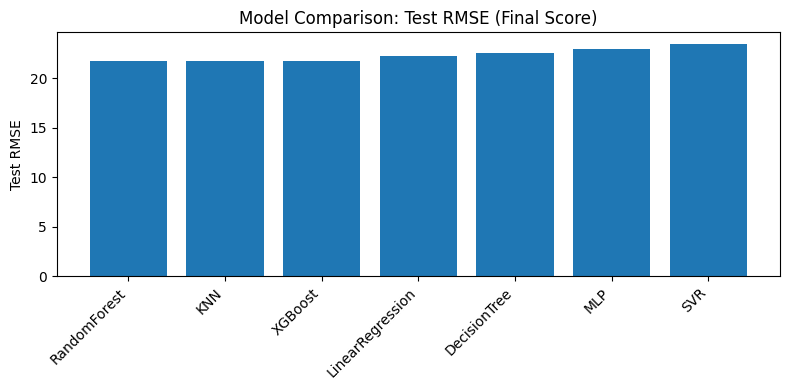

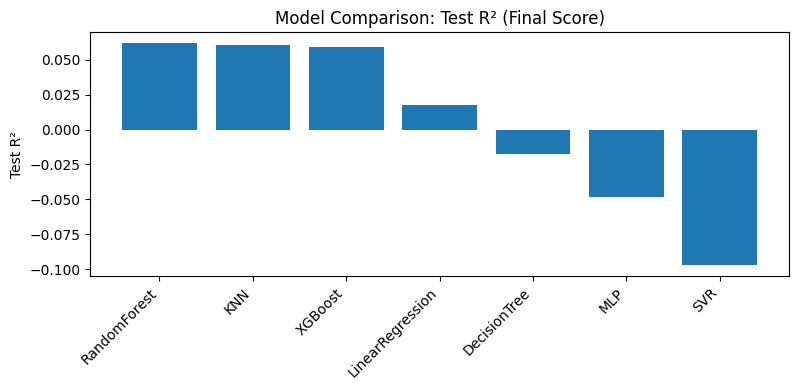

In [74]:
from sklearn.compose import ColumnTransformer

numeric_features = predictors      # the 12 motivation variables
categorical_features = cluster_features  # the cluster labels

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", "passthrough", categorical_features)
    ]
)

results = []

for name, cfg in models_and_grids.items():
    print(f"\n=== {name} ===")

    pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", cfg["model"])])

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=cfg["params"],
        cv=5,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_

    y_pred = best_model.predict(X_test)
    test_rmse = root_mean_squared_error(y_test, y_pred)
    test_r2   = r2_score(y_test, y_pred)

    print("Best params:", grid.best_params_)
    print("Test RMSE:", test_rmse)
    print("Test R^2:", test_r2)

    results.append({
        "model": name,
        "test_rmse": test_rmse,
        "test_r2": test_r2
    })

results_df = pd.DataFrame(results).sort_values("test_rmse")
display(results_df)

plt.figure(figsize=(8, 4))
plt.bar(results_df["model"], results_df["test_rmse"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Test RMSE")
plt.title("Model Comparison: Test RMSE (Final Score)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(results_df["model"], results_df["test_r2"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Test R²")
plt.title("Model Comparison: Test R² (Final Score)")
plt.tight_layout()
plt.show()

## Analysis and results (adding clustering number)

### From the results, random forest had the lowest RMSE and the highest R^^2. Adding the clustering number did not yield a better model performance.

In [76]:
import statsmodels.api as sm

predictors = ['MAP','PAP','PAV','SEFF','TOI','AV','IV','UV','EC','OC','PC','MS']
target = 'Exam1'

X = Dosage_Motivation[predictors].copy()
y = Dosage_Motivation[target].copy()

# Add intercept
X_const = sm.add_constant(X)

model = sm.OLS(y, X_const)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Exam1   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.131
Date:                Mon, 24 Nov 2025   Prob (F-statistic):             0.0139
Time:                        20:56:48   Log-Likelihood:                -2125.3
No. Observations:                 524   AIC:                             4277.
Df Residuals:                     511   BIC:                             4332.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.1110      8.763      8.800      0.0

In [77]:
predictors = ['MAP','PAP','PAV','SEFF','TOI','AV','IV','UV','EC','OC','PC','MS']
target = 'FinalScore'

X = Dosage_Motivation[predictors].copy()
y = Dosage_Motivation[target].copy()

# Add intercept
X_const = sm.add_constant(X)

model = sm.OLS(y, X_const)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             FinalScore   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.478
Date:                Mon, 24 Nov 2025   Prob (F-statistic):              0.128
Time:                        20:56:54   Log-Likelihood:                -2378.1
No. Observations:                 524   AIC:                             4782.
Df Residuals:                     511   BIC:                             4838.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.9642     14.195      2.956      0.0

## Analysis and results (linear regression)

### If I just use linear regression to include all the variables, motivation variables (performance-avoidance goals, self-efficacy, and effort cost) predicted the exam1 score with a R^^2 of 0.048, but all the motivation variables did not predict the final score.

## Discussion

### Learning and takeaways: (1) For supervised learning, linear regression and decision trees are the simple models with high interpretability. Random forest, XGBoost, SVM, and neural models are becoming more complex but with low interpretability. In this analysis, I tried different models to predict the exam1 score and final score, simpler models, such as linear regression and decision trees, actually performed a better performance with lower RMSE and higher R^^2; (2) in psychology, due to the data generation because evenly distributed items, there is less nonlinear relationship. Maybe this is one reason why using simpler models works; (3) for unsupervised learning, I tried k-means clustering, GMM clustering, and hierarchical clustering. The number of clusters is chosen by the analysers. Although the number of clusters based on values of each variable theoretically make sense, there are no differences detected among different clusters. 

## Ways to improve: (1) dummy coding the generated clustering numbers; (2) check the number of observations in each cluster to think about whether some small clusters can be combined into big clusters.
